# Predicción de Riesgo de Evento Cardíaco con Señales de ECG Usando la Base de Datos PTB Diagnostic ECG y PTB-XL.

El proyecto se centra en la predicción del riesgo de eventos cardíacos utilizando registros de ECG (electrocardiogramas) de la base de datos PTB Diagnostic ECG y PTB-XL de PhysioNet. La finalidad es desarrollar un modelo de aprendizaje profundo que ayude a identificar pacientes en riesgo de sufrir eventos cardíacos, basándose en características extraídas de los datos electrocardiográficos.

## Objetivo

- Predecir el riesgo de eventos cardíacos, un enfoque clave para la atención preventiva y el tratamiento de enfermedades cardiovasculares.
- Resaltar la importancia de este análisis para mejorar el diagnóstico temprano y el tratamiento.
- Comparar el rendimiento de diferentes modelos de aprendizaje profundo en la predicción de eventos cardíacos.

## Contexto

El infarto agudo de miocardio con elevación del segmento ST, conocido como STEMI (por sus siglas en inglés, ST-Elevation Myocardial Infarction), es una forma grave de ataque cardíaco caracterizada por una obstrucción completa de una de las arterias principales del corazón. Esta obstrucción provoca la interrupción del flujo sanguíneo, resultando en daño significativo al músculo cardíaco. El diagnóstico de STEMI se realiza mediante el análisis de los cambios en el electrocardiograma (ECG), donde la elevación del segmento ST indica una isquemia grave y un riesgo elevado de muerte si no se trata de manera inmediata.

## Metodología

**Obtención de datos** : Se descargan los datos de la base de datos PTB Diagnostic ECG y PTB-XL de PhysioNet.

- Para la base de datos PTB Diagnostic ECG, se descarga la base de datos en su totalidad debido a que los registros a utilizar estan dispersos y la gran mayoria será utilizada para el análisis posterior.
- Para la base de datos PTB-XL sólo se descarga una parte debido a que no se utiliza en su totalidad.
  
**Exploración de datos** :Se analizan las características de los datos y se visualizan los registros de ECG.
- Se identifica la distribución de las clases STEMI y HC (Healthy Control) en la base de datos PTB Diagnostic ECG mediante el uso de un atributo "comment" propio de cada registro.
- Se explicita la problematica de la base de datos PTB Diagnostic ECG, la cual se refiere al desbalance de clases respecto a los registros STEMI y HC.
- Se explicita la solución seleccionada respecto a la problematica cual se refiere al uso de otra base de datos (PTB-XL) para obtener y balancear los registros HC (Clase minoritaria). 
  
**Preprocesamiento de datos** : Se realizan tareas de limpieza y transformación de los datos para su uso en el modelo.
- Los registros identificados como STEMI son copiados una carpeta para su posterior procesamiento.
- Se eliminan los canales vx, vy y vz de los registros STEMI.
- Se realiza un downsampling de los registros STEMI de 1000hz a 500Hz.
- Se realiza un limpieza utilizando el algoritmo Butterworth para eliminar el ruido de los registros STEMI.
- Los registros HC no son alterados en este proceso.
   
**Extracción de características**: Se extraen características relevantes de los registros de ECG.
- Para el modelado simple, se extraen características de media, desviación estándar, valores minimo y valores máximos para los 12 canales de los registros STEMI y HC.
- Para el modelado complejo, se extraen las caracteristicas de cada segmento QRS y ST de cada latido en cada canal. 
 
**Modelado**: Se entrena un modelo de aprendizaje profundo para predecir el riesgo de eventos cardíacos.
- Uso de Random Forest para la clasificación de los registros STEMI y HC para cada modelado.
  
**Evaluación**: 
- Uso de la matriz de confusión para evaluar el rendimiento del modelo.
- Uso de indicador f1 score para evaluar el rendimiento del modelo.
 
**Guardado de modelo**
- Se guarda el modelo entrenado para su uso futuro.

## Consideraciones

*El procesamiento de los datos es lento debido a la cantidad de datos a utilizar (1,7gb con 549 registros de 290 sujetos de la base de datos PTB Diagonstic ECG Y 128mb de PTB-XL), por lo que se sugiere realizar este procesamiento de forma local. Mas información en https://research.google.com/colaboratory/local-runtimes.html*

Con motivo de no saturar la memoria RAM durante el desarrollo de este proyecto, se decidió utilizar un enfoque de carga y uso inmediato de los datos, es decir, se carga un registro, se procesa y se elimina de la memoria para liberar espacio. Este enfoque puede ser lento, pero es efectivo para evitar problemas de memoria debido a la gran cantidad de datos a procesar. Este enfoque se utilizó debido a problematicas encontradas durante el desarrollo de este proyecto relacionados a uso intensivo de memoria RAM llegando a ocupar mas de 20gb y produciendo efectos tales como congelamientos o reinicios inesperados.





Los datos fueron extraidos directamente de la página [Physionet.org](https://physionet.org/)

Enlace PTB Diagnostic ECG: https://physionet.org/content/ptbdb/1.0.0/

Enlace PTB-XL: https://physionet.org/content/ptb-xl/1.0.1/

## Instalación de librerías


| Biblioteca   | Descripción                                                                                                                                                                                                 |
|--------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **wfdb**     | La biblioteca wfdb (WaveForm DataBase) se utiliza para trabajar con datos de señales fisiológicas, como electrocardiogramas (ECG). Es útil para leer, escribir y procesar datos de señales fisiológicas almacenados en el formato de la base de datos WFDB. |
| **Seaborn**  | seaborn es una biblioteca de visualización de datos basada en matplotlib. Se utiliza para crear gráficos estadísticos atractivos y fáciles de interpretar. Facilita la visualización de datos complejos con menos código. |
| **Torch**    | Torch es la biblioteca principal de PyTorch, un marco de trabajo de aprendizaje profundo (deep learning). Se utiliza para construir y entrenar modelos de aprendizaje profundo. Es popular en la investigación y desarrollo de redes neuronales y otros algoritmos de machine learning. |
| **Numpy**    | Biblioteca fundamental para la computación científica en Python. Se utiliza para trabajar con arreglos multidimensionales y matrices, y proporciona una gran colección de funciones matemáticas para operar con estos datos de manera eficiente. |
| **Matplotlib** | Biblioteca de visualización de datos en Python. Se utiliza para crear gráficos estáticos, animados e interactivos en Python. Es muy versátil y permite generar una amplia variedad de gráficos, como líneas, barras, histogramas, dispersión, etc. |
| **Boto3**    | Biblioteca de Amazon Web Services (AWS) para Python. Se utiliza para interactuar con los servicios de AWS, como S3, EC2, DynamoDB, entre otros. Facilita la automatización y gestión de recursos en la nube de AWS desde aplicaciones Python. |
| **Pandas**   | Biblioteca de Python para la manipulación y análisis de datos. Se utiliza para trabajar con estructuras de datos como DataFrames, que permiten manipular, limpiar y analizar datos de manera eficiente. Es muy útil para tareas de preprocesamiento de datos. |
| **Scikit-learn** | Es una biblioteca de aprendizaje automático en Python. Se utiliza para construir y evaluar modelos de machine learning. Proporciona herramientas para clasificación, regresión, clustering, reducción de dimensionalidad, y más. |
| **Scipy**    | Biblioteca de Python que se basa en numpy y proporciona algoritmos y herramientas adicionales para la computación. Se utiliza para tareas de optimización, integración, interpolación, álgebra lineal, y otras operaciones matemáticas avanzadas. |
| **biosppy** | Biblioteca de Python que permite identificar picos R de una señal dada. 


In [1]:
# Instalación de librerías

%pip install wfdb
%pip install seaborn
%pip install torch
%pip install numpy
%pip install matplotlib
%pip install pandas
%pip install scikit-learn
%pip install scipy
%pip install boto3
%pip install biosppy


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Obtención de Datos

### Descarga de datos de la base de datos PTB Diagnostic ECG

La descarga de los datos en este documento se realiza de manera automatica utilizando la libreria boto3 de AWS, pero también se puede descargar manualmente desde el enlace original (https://physionet.org/content/ptbdb/1.0.0/). (Seguir las instrucciones de descarga manual en el bloque subsiguiente)



In [ ]:
import boto3
from botocore import UNSIGNED
from botocore.config import Config
import os

# Configuración de variables
bucket_name = "physionet-open"
prefix = "ptbdb/1.0.0/"  # Carpeta en el bucket S3
destination = "./Databases/PTB-DIAGNOSTIC-DATABASE" 


s3 = boto3.client('s3', config=Config(signature_version=UNSIGNED))

# Inicializa la paginación
continuation_token = None

while True:
    # Prepara los parámetros para la llamada a la API
    params = {
        'Bucket': bucket_name,
        'Prefix': prefix
    }
    if continuation_token:
        params['ContinuationToken'] = continuation_token

    # Llama a list_objects_v2
    objects = s3.list_objects_v2(**params)

    # Verifica si hay objetos en la respuesta
    if 'Contents' in objects:
        for obj in objects['Contents']:
            # Obtener el nombre del archivo y el subdirectorio en S3
            s3_key = obj['Key']
            
            # Crear la ruta local completa para el archivo
            local_file_path = os.path.join(destination, s3_key[len(prefix):])  # Omite el prefijo en la ruta local

            # Crear directorios locales si no existen
            os.makedirs(os.path.dirname(local_file_path), exist_ok=True)

            # Verificar si el archivo ya existe antes de descargar
            if not os.path.exists(local_file_path):
                # Descargar el archivo
                try:
                    s3.download_file(bucket_name, s3_key, local_file_path)
                    print(f"Descargado: {s3_key} a {local_file_path}")
                except Exception as e:
                    print(f"Error al descargar {s3_key}: {e}")
            else:
                print(f"El archivo ya existe: {local_file_path}")

    # Verifica si hay un token de continuación
    continuation_token = objects.get('NextContinuationToken')
    if not continuation_token:
        break  # Salir del bucle si no hay más objetos

print("Descarga completada.")


' \n# Configuración de variables\nbucket_name = "physionet-open"\nprefix = "ptbdb/1.0.0/"  # Carpeta en el bucket S3\ndestination = "./Databases/PTB-DIAGNOSTIC-DATABASE" \n\n\ns3 = boto3.client(\'s3\', config=Config(signature_version=UNSIGNED))\n\n# Inicializa la paginación\ncontinuation_token = None\n\nwhile True:\n    # Prepara los parámetros para la llamada a la API\n    params = {\n        \'Bucket\': bucket_name,\n        \'Prefix\': prefix\n    }\n    if continuation_token:\n        params[\'ContinuationToken\'] = continuation_token\n\n    # Llama a list_objects_v2\n    objects = s3.list_objects_v2(**params)\n\n    # Verifica si hay objetos en la respuesta\n    if \'Contents\' in objects:\n        for obj in objects[\'Contents\']:\n            # Obtener el nombre del archivo y el subdirectorio en S3\n            s3_key = obj[\'Key\']\n            \n            # Crear la ruta local completa para el archivo\n            local_file_path = os.path.join(destination, s3_key[len(prefix

#### Descarga manual de base de datos PTB Diagnostic Database (opcional)

La descarga manual y directa desde physionet en general es mas lenta por lo que se recomienda utilizar el metodo anterior de AWS. En caso de necesitar hacer la descarga manual, se debe asegurar tener instalado el [AWS CLI](https://docs.aws.amazon.com/es_es/cli/latest/userguide/getting-started-install.html) (_Click para más información_) para efectuar la descarga utilizando el comando ```aws s3 sync --no-sign-request s3://physionet-open/ptbdb/1.0.0/ DESTINATION```. 

**Nota:** Reemplazar DESTINATION por la ruta donde se desea guardar los datos.

La carpeta de la base de datos descargada debe tener de nombre "PTB-DIAGNOSTIC-DATABASE" y contener las carpetas de los pacientes con los archivos .dat, .hea y .xyz. 
Esta carpeta debe estar contenida en "Databases" la cual debe estar en la raiz del proyecto tal como se muestra en la siguiente estructura:

```
├── Databases
│   ├── PTB-DIAGNOSTIC-DATABASE
│   │   ├── patient001
│   │   │   ├── s0010_re.dat
│   │   │   ├── s0010_re.hea
│   │   │   ├── s0010_re.xyz
│   │   │   ├── ...
│   │   ├── patient002
│   │   │   ├── s0015lre.dat
│   │   │   ├── s0015lre.hea
│   │   │   ├── s0015lre.xyz
│   │   │   ├── ...
│   │   ├── ...
│   ├── PTB-XL
├── Readme.md
├── Prediccion_Riesgo_Evento_Cardiaco.ipynb
└── .gitignore
```

### Descarga de datos de la base de datos PTB-XL

De la misma manera en que se descargó la base de datos PTB Diagnostic Database, se descarga la base de datos PTB-XL pero sólo una sección de esta.

La descarga selectiva de esta base de datos se compone de las siguientes características:

- Se descargan los documentos alojados en la carpeta raiz de la base de datos
- Solo se descarga la subcarpeta "00000" de la carpeta "records500"
- Las demás carpetas no se descargan

Las restricciones impuestas a la descarga es para salvar tiempo y espacio en disco, ya que esta base de datos en su carpeta "00000" contiene suficiente información para realizar el análisis posterior.

Seguir las instrucciones de descarga manual en el bloque subsiguiente si se requiere la descarga de los datos sin utilizar el codigo a continuación

In [ ]:
import boto3
from botocore import UNSIGNED
from botocore.config import Config
import os

# Configuración de variables
bucket_name = "physionet-open"
prefix = "ptb-xl/1.0.3/"  # Carpeta en el bucket S3
destination = "./Databases/PTB-XL"  # Cambia esto a la ruta local de destino

s3 = boto3.client('s3', config=Config(signature_version=UNSIGNED))

# Inicializa la paginación
continuation_token = None

while True:
    # Prepara los parámetros para la llamada a la API
    params = {
        'Bucket': bucket_name,
        'Prefix': prefix
    }
    if continuation_token:
        params['ContinuationToken'] = continuation_token

    # Llama a list_objects_v2
    objects = s3.list_objects_v2(**params)

    # Verifica si hay objetos en la respuesta
    if 'Contents' in objects:
        for obj in objects['Contents']:
            # Obtener el nombre del archivo y el subdirectorio en S3
            s3_key = obj['Key']
            
            # Verificar si el archivo pertenece a las carpetas que queremos evitar
            if 'records100' in s3_key or('records500' in s3_key and '00000' not in s3_key):
                print("El archivo "+s3_key+" ha sido ignorado para su descarga")
                continue
            
            # Crear la ruta local completa para el archivo
            local_file_path = os.path.join(destination, s3_key[len(prefix):])  # Omite el prefijo en la ruta local

            # Crear directorios locales si no existen
            os.makedirs(os.path.dirname(local_file_path), exist_ok=True)

            # Verificar si el archivo ya existe antes de descargar
            if not os.path.exists(local_file_path):
                # Descargar el archivo
                try:
                    s3.download_file(bucket_name, s3_key, local_file_path)
                    print(f"Descargado: {s3_key} a {local_file_path}")
                except Exception as e:
                    print(f"Error al descargar {s3_key}: {e}")
            else:
                print(f"El archivo ya existe: {local_file_path}")

    # Verifica si hay un token de continuación
    continuation_token = objects.get('NextContinuationToken')
    if not continuation_token:
        break  # Salir del bucle si no hay más objetos

print("Descarga completada.")


' \n# Configuración de variables\nbucket_name = "physionet-open"\nprefix = "ptb-xl/1.0.3/"  # Carpeta en el bucket S3\ndestination = "./Databases/PTB-XL"  # Cambia esto a la ruta local de destino\n\ns3 = boto3.client(\'s3\', config=Config(signature_version=UNSIGNED))\n\n# Inicializa la paginación\ncontinuation_token = None\n\nwhile True:\n    # Prepara los parámetros para la llamada a la API\n    params = {\n        \'Bucket\': bucket_name,\n        \'Prefix\': prefix\n    }\n    if continuation_token:\n        params[\'ContinuationToken\'] = continuation_token\n\n    # Llama a list_objects_v2\n    objects = s3.list_objects_v2(**params)\n\n    # Verifica si hay objetos en la respuesta\n    if \'Contents\' in objects:\n        for obj in objects[\'Contents\']:\n            # Obtener el nombre del archivo y el subdirectorio en S3\n            s3_key = obj[\'Key\']\n            \n            # Verificar si el archivo pertenece a las carpetas que queremos evitar\n            if \'records10

#### Descarga manual de base de datos PTB-XL (opcional)

La descarga manual y directa desde physionet en general es mas lenta por lo que se recomienda utilizar el metodo anterior de AWS. En caso de necesitar hacer la descarga manual, se debe asegurar tener instalado el [AWS CLI](https://docs.aws.amazon.com/es_es/cli/latest/userguide/getting-started-install.html) (_Click para más información_) para efectuar la descarga utilizando los siguientes comandos: 
- ```aws s3 sync --no-sign-request s3://physionet-open/ptb-xl/1.0.3/records500/00000/ DESTINATION```. 
- ```aws s3 sync --no-sign-request s3://physionet-open/ptb-xl/1.0.3/ptbxl_database.csv DESTINATION```

**Nota:** Reemplazar DESTINATION por la ruta donde se desea guardar los datos.

La carpeta de la base de datos descargada debe tener de nombre "PTB-XL" y contener la carpeta "records500" y la subcarpeta "00000" con los archivos .dat y .hea. 
Esta carpeta debe estar contenida en "Databases" la cual debe estar en la raiz del proyecto tal como se muestra en la siguiente estructura:

```
├── Databases
│   ├── PTB-XL
│   │   ├── records500
│   │   │   ├── 00000
│   │   │   │   ├── 00001_hr.dat
│   │   │   │   ├── 00001_hr.hea
│   │   │   │   ├── 00002_hr.dat
│   │   │   │   ├── 00002_hr.hea
│   │   │   │   ├── 00003_hr.dat
│   │   │   │   ├── 00003_hr.hea
│   │   │   │   ├── ...
│   │   ├── ptbxl_database.csv
│   ├── PTB-DIAGNOSTIC-DATABASE
├── Readme.md
├── Prediccion_Riesgo_Evento_Cardiaco.ipynb
└── .gitignore
```

### Establecimiento de variables de referencia a directorios y archivos

Aqui se establecen las variables que se utilizarán para hacer referencia a los archivos y datos correspondientes a los registros ECG de ambas bases de datos.

#### PTB Diagnostic ECG

In [4]:
folder_path_ptb_diagnostic = './Databases/PTB-DIAGNOSTIC-DATABASE' # Ruta a base de datos PTB-DIAGNOSTIC-DATABASE



Aqui se utiliza el archivo RECORDS que contiene todas las referencias de los nombres de los pacientes como tambien de sus archivos asociados

In [5]:
ruta_records = folder_path_ptb_diagnostic + '/RECORDS'

# Leer el archivo 'records' para obtener la lista de archivos
with open(ruta_records, 'r') as f:
    registros = f.read().splitlines()

# Ver las rutas de los registros
print(registros)

['patient001/s0010_re', 'patient001/s0014lre', 'patient001/s0016lre', 'patient002/s0015lre', 'patient003/s0017lre', 'patient004/s0020are', 'patient004/s0020bre', 'patient005/s0021are', 'patient005/s0021bre', 'patient005/s0025lre', 'patient005/s0031lre', 'patient005/s0101lre', 'patient006/s0022lre', 'patient006/s0027lre', 'patient006/s0064lre', 'patient007/s0026lre', 'patient007/s0029lre', 'patient007/s0038lre', 'patient007/s0078lre', 'patient008/s0028lre', 'patient008/s0037lre', 'patient008/s0068lre', 'patient009/s0035_re', 'patient010/s0036lre', 'patient010/s0042lre', 'patient010/s0061lre', 'patient011/s0039lre', 'patient011/s0044lre', 'patient011/s0049lre', 'patient011/s0067lre', 'patient012/s0043lre', 'patient012/s0050lre', 'patient013/s0045lre', 'patient013/s0051lre', 'patient013/s0072lre', 'patient014/s0046lre', 'patient014/s0056lre', 'patient014/s0071lre', 'patient015/s0047lre', 'patient015/s0057lre', 'patient015/s0152lre', 'patient016/s0052lre', 'patient016/s0060lre', 'patient01

#### PTB-XL

In [6]:
# Ruta del archivo ptbxl_database.csv el cual contiene la información de cada registro de la base de datos.
ruta_csv_ptb_xl = './Databases/PTB-XL/ptbxl_database.csv'

In [7]:
ruta_records_ptb_xl = './Databases/PTB-XL/records500/00000/'

## Identificación de Pacientes STEMI y Sanos (HC)

La base de datos PTB Diagnostic ECG contiene un atributo llamado "comments" el cual contiene información relevante sobre el paciente, en este caso se busca identificar a los pacientes que han sufrido un infarto agudo de miocardio.

### Establecimiento de funciones

En los siguientes bloques se definen funciones relacionadas con la busqueda de pacientes STEMI Y HC.

In [8]:
import wfdb
import os

locations_frecuencia = {}

# Busca los nombres y frecuencias de cada localización  de un registro dado
def buscarLocations(registro):
    # Obtener la localización del registro
    location = registro.comments[5].split(':')[1].strip()
    # Verificar si la localización ya está en el diccionario
    if location in locations_frecuencia:
        # Incrementar la frecuencia
        locations_frecuencia[location]['frec'] += 1
    else:
        # Añadir la localización al diccionario con su frecuencia inicial
        locations_frecuencia[location] = {'nombre': location, 'frec': 1}

Esta función permite filtrar los pacientes STEMI y HC. Además de contar la cantidad de localizaciones en los registros STEMI y la cantidad de registros HC de la base de datos PTB Diagnostic ECG

In [9]:
stemi_avoid_locations = ['no', 'n/a', 'unknown']
locations_frecuencia_filtrados = {}
healthy_locations = {}

# Busca los nombres y frecuencias de cada localización de un registro dado
# Tambien hace una identificación de los registros STEMI y HC mediante la razon de ingreso 'Myocardial infarction'
def buscarLocationsFiltered(registro):
    # Obtener la razon de ingreso
    reason = registro.comments[4].split(':')[1].strip()
    # Obtener la localización del registro
    location = registro.comments[5].split(':')[1].strip()
    # Verificar si la razón es 'Myocardial infarction'
    if reason == 'Myocardial infarction':
        # Verificar si la localización no está en la lista de localizaciones a evitar
        if location not in stemi_avoid_locations:
            # Añadir la localización al diccionario de localizaciones con STEMI
            if location in locations_frecuencia_filtrados:
                locations_frecuencia_filtrados[location]['frec'] += 1
            else:
                locations_frecuencia_filtrados[location] = {'nombre': location, 'frec': 1}
    elif reason == 'Healthy control': # Verificar si la razón es 'Healthy control'
        # Añadir la localización al diccionario de localizaciones sanas
        if reason in healthy_locations:
                healthy_locations[reason]['frec'] += 1
        else:
            healthy_locations[reason] = {'nombre': reason, 'frec': 1}

Esta función permite iterar sobre la base de datos PTB Diagnostic Database

In [10]:
import os
import wfdb
# Esta función itera sobre los registros de la base de datos PTB Diagnostic
# Admite un path que es la ruta de la base de datos, una lista de registros y una función que se ejecutará en cada registro
def PTBDiagnosticDatabaseIterator(path,registros,funcion):
    for registro in registros:
        try:
            # Construir la ruta completa para el archivo
            record_path = os.path.join(path, registro)

            # Cargar el archivo
            record = wfdb.rdrecord(record_path)

            # Ejecutar la función con el registro cargado
            funcion(record)

        except Exception as e:
            print(f"Error cargando {record_path}: {e}")

Esta función permite mostrar la información de un registro dado de la base de datos PTB Diagnostic ECG

In [11]:
# Mostrar atributos de un registro
def showAtributesPTB_Diagnostic(registro):
    print(f"record_name: {registro.record_name}")
    print(f"n_sig: {registro.n_sig}")
    print(f"fs: {registro.fs} Hz")
    print(f"sig_name: {registro.sig_name}")
    print(f"sig_len:  {registro.sig_len}")
    print(f"comments: {registro.comments}")
    print(f"p_signal: {registro.p_signal}")
    print()

    print("Keys importantes: ")
    print(f"Reason for admission: {registro.comments[4].split(':')[1].strip()}")
    print(f"Acute infarction (localization): {registro.comments[5].split(':')[1].strip()}")
    print()

### Identificación de atributos de la base de datos PTB Diagnostic ECG

A continuación se muestra los atributos de un registro de la base de datos PTB Diagnostic ECG

In [12]:
# Construcción de la ruta al archivo
record_path = os.path.join(folder_path_ptb_diagnostic, registros[0])

# Cargar el archivo
record = wfdb.rdrecord(record_path)

# Mostrar atributos del registro
showAtributesPTB_Diagnostic(record)

record_name: s0010_re
n_sig: 15
fs: 1000 Hz
sig_name: ['i', 'ii', 'iii', 'avr', 'avl', 'avf', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'vx', 'vy', 'vz']
sig_len:  38400
comments: ['age: 81', 'sex: female', 'ECG date: 01/10/1990', 'Diagnose:', 'Reason for admission: Myocardial infarction', 'Acute infarction (localization): infero-latera', 'Former infarction (localization): no', 'Additional diagnoses: Diabetes mellitus', 'Smoker: no', 'Number of coronary vessels involved: 1', 'Infarction date (acute): 29-Sep-90', 'Previous infarction (1) date: n/a', 'Previous infarction (2) date: n/a', 'Hemodynamics:', 'Catheterization date: 16-Oct-90', 'Ventriculography: Akinesia inferior wall', 'Chest X-ray: Heart size upper limit of norm', 'Peripheral blood Pressure (syst/diast):  140/80 mmHg', 'Pulmonary artery pressure (at rest) (syst/diast): n/a', 'Pulmonary artery pressure (at rest) (mean): n/a', 'Pulmonary capillary wedge pressure (at rest): n/a', 'Cardiac output (at rest): n/a', 'Cardiac index (at re

#### Análisis de los atributos

Cada registro de la base de datos PTB Diagnostic ECG contiene al menos los siguientes atributos:

- **record_name**: Nombre del registro.
- **n_sig**: Número de señales en el registro.
- **fs**: Frecuencia de muestreo de las señales.
- **sig_name**: Nombre de las señales.
- **sig_len**: Longitud de las señales.
- **comments**: Comentarios sobre el registro.
- **p_signal**: Señales físicas.

Como se puede observar, en el atributo 'comments' existe una lista de información relevante sobre el paciente, en la cual se puede identificar que el valor de la llave **'Reason for admission'** clasifica a al registro como _'Myocardal infarction'_ en este caso. También existe la clave **'Acute infarction (localization)'** que indica la localización del infarto.

Basado en lo anterior, se puede identificar los registros STEMI que tengan como razon de admision "Myocardal infarction" pero se debe verificar que la localización del infarto sea correcta. Razón por la cual se realiza una busqueda de valores unicos en la llave **'Acute infarction (localization)'** para hacer un filtrado y obtener registros con la mayor información de calidad posible

### Búsqueda de valores únicos en la key 'Acute infarction (localization)'

Aqui se llama a la función iteradora de la base de datos PTB Diagnostic ECG para buscar los valores únicos en la key 'Acute infarction (localization)' en cada registro 

In [13]:
# Llamado a función para buscar las localizaciones de los infartos
PTBDiagnosticDatabaseIterator(folder_path_ptb_diagnostic,registros,buscarLocations)


Aqui se listan los valores unicos encontrados:


In [14]:

print('Frecuencia de cada valor único del atributo Acute infarction (localization):')
for location, data in locations_frecuencia.items():
    print(f"{data['nombre']}")

Frecuencia de cada valor único del atributo Acute infarction (localization):
infero-latera
anterior
infero-postero-lateral
antero-septal
inferior
infero-lateral
infero-poster-lateral
antero-lateral
lateral
postero-lateral
posterior
no
infero-posterior
n/a
antero-septo-lateral
unknown


Aqui se muestra un histograma de frecuencias de cada localización encontrada en el apartado 'Acute infarction (localization)' en el atributo 'comments' de la base de datos PTB Diagnostic ECG.

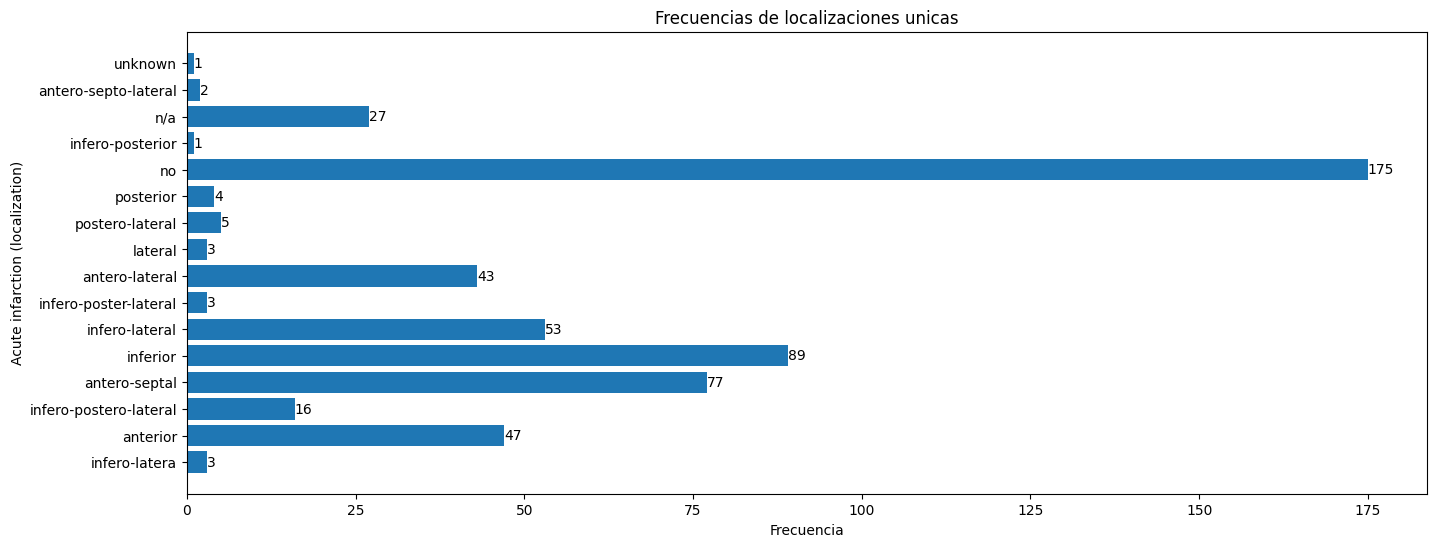

In [15]:
# Plot de frecuencias de localizaciones unicas
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
frequencies = [data['frec'] for data in locations_frecuencia.values()]
bars = plt.barh(list(locations_frecuencia.keys()), frequencies)
plt.title('Frecuencias de localizaciones unicas')
plt.ylabel('Acute infarction (localization)')
plt.xlabel('Frecuencia')

# Agregar números encima de cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, int(width), ha='left', va='center')

plt.show()

Cabe destacar que estas localizaciones son directamente obtenidas de los registros EGC y no presentan un filtrado o corrección de etiquetas hasta el momento.

### Filtrado de registros que tengan localización descrita en su atributo 'comments'

Aqui se hace un filtrado de los registros que contengan información relacionada a STEMI en su atributo 'comments'. Para esto, se quitan los registros que contengan **'no'**,**'n/a'** y **'unknown'** en el apartado de 'Acute infarction (localization)'.
La elección de los valores a filtrar se debe a que no aportan información relevante para el análisis posterior:
- **'no'**: Valor ambiguo que puede significar que no hubo Infarto o no hay valor.
- **'n/a'**: Valor ambiguo que puede significar que no hubo Infarto o no hay valor.
- **'unknown'**: Indica que no se conoce la localización del infarto.

De forma adicional al filtrado anterior, tambien se hace una segregación de los registros que contengan el valor **'Healthy control'** como razon de llegada para obtener los registros HC de la base de datos PTB Diagnostic ECG.

In [16]:
# Ejecución de filtrado y segregación de registros STEMI Y HC de la base de datos PTB Diagnostic
PTBDiagnosticDatabaseIterator(folder_path_ptb_diagnostic,registros,buscarLocationsFiltered)

Aqui se gráfica el histograma de frecuencias de localizaciones STEMI luego de ser filtrados

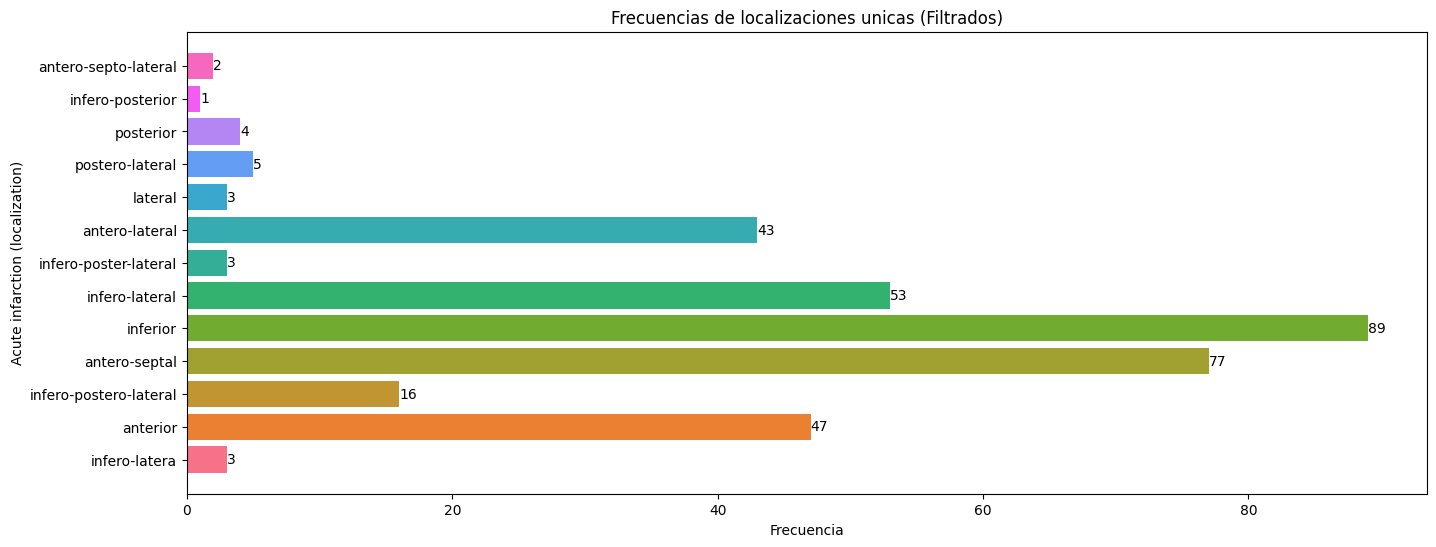

In [17]:
import seaborn as sns

# Plot de frecuencias de localizaciones unicas
import matplotlib.pyplot as plt

# Definir una paleta de colores
palette = sns.color_palette("husl", len(locations_frecuencia_filtrados))

plt.figure(figsize=(16, 6))
stemi_frequencies = [data['frec'] for data in locations_frecuencia_filtrados.values()]

plt.title('Frecuencias de localizaciones unicas (Filtrados)')
bars = plt.barh(list(locations_frecuencia_filtrados.keys()), stemi_frequencies, color=palette)
plt.ylabel('Acute infarction (localization)')
plt.xlabel('Frecuencia')

# Agregado de cantidades encima de cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, int(width), ha='left', va='center')

plt.show()

### Gráfico comparativo de registros STEMI y Sanos (HC)

En este apartado se muestra la cantidad de registros obtenidos de la base de datos PTB Diagnostic ECG clasificandolos en Infarto Agudo de Miocardio con Elevación del Segmento ST (STEMI) y sanos (HC).

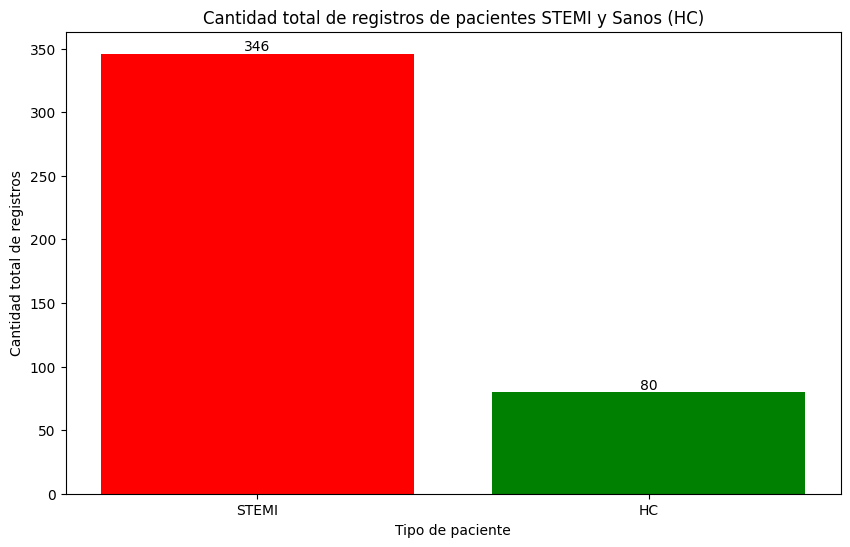

In [18]:
# Histograma para mostrar la cantidad total de registros de pacientes sanos y stemi
plt.figure(figsize=(10, 6))

stemi_total = sum([data['frec'] for data in locations_frecuencia_filtrados.values()])
healthy_total = sum([data['frec'] for data in healthy_locations.values()])

bar_stemi = plt.bar('STEMI', stemi_total, color='red')
bar_healthy = plt.bar('HC', healthy_total, color='green')

# Agregar números encima de cada barra
for bar in [bar_stemi, bar_healthy]:
    height = bar[0].get_height()
    plt.text(bar[0].get_x() + bar[0].get_width() / 2.0, height, '%d' % int(height), ha='center', va='bottom')

plt.title('Cantidad total de registros de pacientes STEMI y Sanos (HC)')
plt.xlabel('Tipo de paciente')
plt.ylabel('Cantidad total de registros')

plt.show()

## Problemática identificada

Existe una claro desbalanceo de pacientes identificados con Infarto Agudo de Miocardio con Elevación del Segmento ST (STEMI) y pacientes sanos (HC) en la base de datos PTB Diagnostic ECG. Este desbalanceo puede afectar el rendimiento de los modelos de aprendizaje automático, ya que el modelo puede tener dificultades para aprender de los datos minoritarios.

## Solución Propuesta

Surgieron las siguientes ideas para abordar el desbalanceo de clases en la base de datos PTB Diagnostic ECG:

1. **Uso de técnicas de resampling**: Se puede utilizar técnicas de resampling como oversampling o undersampling para balancear las clases. Oversampling puede generar nuevos ejemplos de la clase minoritaria, mientras que undersampling puede eliminar ejemplos de la clase mayoritaria.
2. **Generación de datos sintéticos**: Se pueden generar datos sintéticos para la clase minoritaria utilizando técnicas como SMOTE (Synthetic Minority Over-sampling Technique) o ADASYN (Adaptive Synthetic Sampling Approach).
3. **Ajuste de pesos de clase**: Algunos algoritmos de machine learning permiten ajustar los pesos de clase para penalizar más los errores en la clase minoritaria. Esto puede ayudar al modelo a prestar más atención a los ejemplos de la clase minoritaria.
4. **Busqueda de pacientes sanos en otra base de datos**: Se puede utilizar registros de pacientes sanos de otra base de datos para aumentar la cantidad de ejemplos de la clase minoritaria.

Respecto a las soluciones propuestas, se da selección a la **búsqueda de registros de pacientes sanos en otra base de datos**, en este caso la base de datos PTB-XL.

## Cargando nuevos datos de registros de pacientes sanos

Se decidió obtener nuevos registros de otra base de datos debido al desbalanceo de la base de datos PTB Diagnostic ECG. Para esto se utilizó la base de datos PTB-XL, la cual contiene registros de pacientes control sanos (HC).

#### Establecimientos de funciones 

In [19]:
# Muestra los atributos de un registro de la base de datos PTB-XL
def showAtributesPTB_XL(registro):
    print(f"record_name: {registro.record_name}")
    print(f"n_sig: {registro.n_sig}")
    print(f"fs: {registro.fs} Hz")
    print(f"sig_name: {registro.sig_name}")
    print(f"sig_len:  {registro.sig_len}")
    print(f"comments: {registro.comments}")
    print(f"p_signal: {registro.p_signal}")
    print()

# Se obtiene un registro de la base de datos PTB-XL utilizando un id
def obtainRecordPTB_XL(ecg_id):
    # Carga el archivo CSV de la base de datos PTB-XL
    record_path = os.path.join(ruta_records_ptb_xl, ecg_id)
    # Cargar el archivo
    record = wfdb.rdrecord(record_path)
    
    return record

### Identificación de atributos de la base de datos PTB-XL

A continuación se muestra los atributos de un registro de la base de datos PTB-XL

In [20]:
import pandas as pd

# Leer el archivo csv
csv_ptb_xl_data = pd.read_csv(ruta_csv_ptb_xl)

# Obtener el primer ecg_id de csv_ptb_xl_data, se le agrega tantos 0 para tener 5 digitos antes de agregar
# un sufijo '_hr' para obtener el nombre del archivo del registro
ecg_id = f"{str(csv_ptb_xl_data['ecg_id'][0]).zfill(5)}_hr"

# Se obtiene un registro cargado en wfdb
ptb_xl_record_demo = obtainRecordPTB_XL(ecg_id)

# Se imprime los atributos del registro
showAtributesPTB_XL(ptb_xl_record_demo)


record_name: 00001_hr
n_sig: 12
fs: 500 Hz
sig_name: ['I', 'II', 'III', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
sig_len:  5000
comments: []
p_signal: [[-0.115 -0.05   0.065 ... -0.035 -0.035 -0.075]
 [-0.115 -0.05   0.065 ... -0.035 -0.035 -0.075]
 [-0.115 -0.05   0.065 ... -0.035 -0.035 -0.075]
 ...
 [ 0.21   0.205 -0.005 ...  0.185  0.17   0.18 ]
 [ 0.21   0.205 -0.005 ...  0.185  0.17   0.18 ]
 [ 0.21   0.205 -0.005 ...  0.185  0.17   0.18 ]]



#### Análisis de los atributos

Como se puede observar, los atributos del registro de la base de datos PTB-XL comparten similitudes con los de la base de datos PTB Diagnostic ECG, pero con algunas diferencias a continuación:

- **fs**: 500 Hz
- **comments**: Vacío

Los registros de la base de datos PTB-XL no tienen información en el atributo 'comments' por lo tanto su carga de datos para clasificarlos  se debe de realizar de una manera distinta a la realizada con la base de datos PTB Diagnostic ECG.

En este caso, la información referida a los diagnosticos y etiquetas estan registradas en un .csv llamado ptbxl_database.csv.

Respecto a la frecuencia de muestreo, esta es diferente e inferior a los 1000hz de la base de datos PTB Diagnostic ECG.



### Obtención de datos de base de datos PTB-XL


Para esto, se debió realizar un proceso de filtrado de los registros de la base de datos PTB-XL, donde se seleccionaron los registros que no contenían información relacionada a enfermedades cardíacas.

Aqui se retornan los ids de los ecg de registros que contengan '{'NORM': 100.0, 'SR': 0.0}' en el atributo 'scp_codes'. Solo se cargan los primeros 346 registros para el balanceo de clases con los datos STEMI

In [21]:


# extraer las filas en donde su atributo scp_codes contiene 'NORM'

# Aqui se hace una busqueda en la columna scp_codes para encontrar los registros que contienen 'NORM' retornando solo
# los primero 346 elementos encontrados. Luego se le aplica una funcion lambda que rellena el nombre del registro
# con 0 para obtener 5 digitos en total para luego concatenar un guión bajo seguido de las letras 'hr'.
hc_records = csv_ptb_xl_data[csv_ptb_xl_data['scp_codes'].str.contains("{'NORM': 100.0, 'SR': 0.0}")]['ecg_id'].head(346).astype(str).apply(lambda x: x.zfill(5) + '_hr')

# ver las filas seleccionadas
print('Total de HC_records: ', len(hc_records))

hc_records.head()

Total de HC_records:  346


2    00003_hr
3    00004_hr
4    00005_hr
5    00006_hr
6    00007_hr
Name: ecg_id, dtype: object

Una de las principales diferencias con los registros STEMI es la frecuencia de muestreo de esa nueva base de datos, los cuales los registros estan a 500hz

### Comparación de registros STEMI y HC

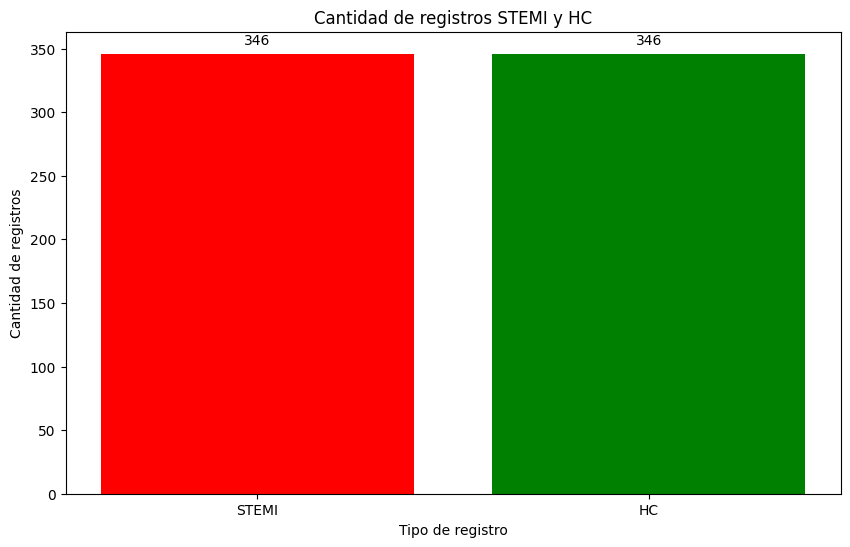

In [22]:
# Histograma de cantidad de registros STEMI de la viable stemi_records y HC_records
plt.figure(figsize=(10, 6))
bars = plt.bar(['STEMI', 'HC'], [stemi_total, len(hc_records)], color=['red', 'green'])
plt.title('Cantidad de registros STEMI y HC')
plt.xlabel('Tipo de registro')
plt.ylabel('Cantidad de registros')

# Agregar números encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center', va='bottom')

plt.show()


Al obtener un set de registros balanceados se puede avanzar a la siguiente etapa.

## Preprocesamiento de Señales ECG

Para el procesamiento de las señales ECG se realizaran las siguientes tareas:
- **Guardado de registros STEMI** en sus respectivo directorio para su procesamiento.
- **Eliminación de canales de posicion de electrodos** identificando los nombres Vx, Vy y Vz.
- **Downsampling de canales** de registros STEMI de 1000 a 500 Hz. 
- **Filtrado de ruido** mediante un filtro pasa banda Butterworth de 0.67 a 30 Hz.

In [23]:
# Permite iterar la base de datos de PTB-XL
def PTBXL_Iterator(function):
    for registro in hc_records:
        try:
            # Construir la ruta completa para el archivo
            record_path = os.path.join('./Databases/PTB-XL/records500/00000/', registro)

            # Cargar el archivo
            record = wfdb.rdrecord(record_path)

            function(record)

        except Exception as e:
            print(f"Error cargando {record_path}: {e}")

# Permite guardar un registro de la base de datos PTB Diagnostric ECG en el disco 
# Verifica tambien que el registro esté catalogado como 'Myocardial infarction'
def PTBDiagnostic_Writer(record):
    folder = ''

    if record.comments[4].split(':')[1].strip() == 'Myocardial infarction':
        if record.comments[5].split(':')[1].strip() not in stemi_avoid_locations:
            # print(record.comments[5].split(':')[1].strip())
            folder = 'STEMI' 

    if folder != '':
        outputPath = os.path.join('./Preprocess/'+folder+'/')
        # Crear directorio local si no existe
        os.makedirs(os.path.dirname(outputPath), exist_ok=True)

        # Agregar la ruta a un archivo RECORDS en la misma carpeta
        with open(os.path.join(outputPath, 'STEMI_RECORDS'), 'a') as f:
            f.write(f'{record.record_name}\n')

        wfdb.wrsamp(
        record_name=record.record_name,  # Nombre del registro
        write_dir=outputPath,        # Nombre completo del archivo con ruta
        fs=record.fs,               # Frecuencia de muestreo
        units=record.units,         # Unidades de las señales
        sig_name=record.sig_name,   # Nombres de las señales
        p_signal=record.p_signal            # La señal en formato numpy array
        )
    

Aqui se hace uso de la función PTBDiagnostic_Writer el cual busca los registros STEMI y los guarda en la carpeta ./Preprocess/STEMI/ . Adicionalmente se agrega un archivo STEMI_RECORDS para tener un listado de todos los registros almacenados en esa carpeta.

In [24]:
PTBDiagnosticDatabaseIterator(folder_path_ptb_diagnostic,registros,PTBDiagnostic_Writer)

### Eliminación de canales de posición de electrodos

Los registros STEMI contienen información de la posición de los electrodos por lo tanto se procede a eliminar estos canales de los registros debido a que no aportan información relevante para el análisis.

In [25]:

folder_path_preprocess_stemi = './Preprocess/STEMI'
ruta_records_stemi = os.path.join(folder_path_preprocess_stemi + '/STEMI_RECORDS')

# Eliminar los canales vx, vy y vz
def deleteStemiLeadPositions(record):
        record.sig_name = record.sig_name[:12]
        record.p_signal = record.p_signal[:, :12]
        record.units = record.units[:12]


        # Sobreescribir registro stemi
        wfdb.wrsamp(
        record_name=record.record_name,  # Nombre del registro
        write_dir=folder_path_preprocess_stemi,        # Nombre completo del archivo con ruta
        fs=record.fs,               # Frecuencia de muestreo
        units=record.units,         # Unidades de las señales
        sig_name=record.sig_name,   # Nombres de las señales
        p_signal=record.p_signal            # La señal en formato numpy array
        )



# Leer el archivo 'records' para obtener la lista de archivos
with open(ruta_records_stemi, 'r') as f:
    registros_stemi = f.read().splitlines()





In [26]:
# Eliminando los canales de los registros STEMI y guardandolos en el directorio Preprocess/STEMI/
PTBDiagnosticDatabaseIterator(folder_path_preprocess_stemi,registros_stemi, deleteStemiLeadPositions)

### Downsampling de registros STEMI

Se realiza un downsampling de los registros STEMI de 1000 a 500 Hz para que coincida con la frecuencia de muestreo de los registros HC obtenido de la base de datos PTB-XL.

In [27]:

from scipy.signal import resample
import numpy as np
# Downsample de señales de los registros stemi_records de 1000hz a 500 Hz

def downsample_ecg_to_500hz(record):

    downsampled_signals = []
    for signal in record.p_signal.T:
        new_length = signal.shape[0] // 2
        downsampled_signal = resample(signal, new_length)
        downsampled_signals.append(downsampled_signal)
    
    record.p_signal = np.array(downsampled_signals).T


    # Sobreescribir registro stemi
    wfdb.wrsamp(
    record_name=record.record_name,  # Nombre del registro
    write_dir=folder_path_preprocess_stemi,        # Nombre completo del archivo con ruta
    fs=500,               # Frecuencia de muestreo
    units=record.units,         # Unidades de las señales
    sig_name=record.sig_name,   # Nombres de las señales
    p_signal=record.p_signal            # La señal en formato numpy array
    )


Aqui se hace uso de la función downsample_ecg_to_500hz para realizar el downsampling de los registros STEMI

In [28]:
# Disminuyendo de 1000hz a 500hz
PTBDiagnosticDatabaseIterator(folder_path_preprocess_stemi,registros_stemi, downsample_ecg_to_500hz)

### Filtrado de ruido en señales ECG

Se realiza un filtrado de ruido en las señales ECG mediante un filtro pasa banda Butterworth de 0.67 a 30 Hz a los registros STEMI.
A los registros HC no se les aplica este filtro debido a que ya se encuentran filtrados en la base de datos PTB-XL.

Creación de función de filtro butterworth

In [29]:
import numpy as np
from scipy.signal import butter, filtfilt

def butter_bandpass(lowcut, highcut, fs, order=3):
    nyquist = 0.5 * fs  # Frecuencia de Nyquist
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=3):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y


Función para hacer el filtrado en todas las señales de un registro

In [30]:


# Parámetros del filtro
lowcut = 0.67  # Frecuencia mínima (Hz)
highcut = 30.0  # Frecuencia máxima (Hz)
fs = 500  # Frecuencia de muestreo (Hz), 1 kHz para la base de datos PTB, 0,5 kHz para los datos preprocesados

def filter_ecg_records(record):

    for signal in record.p_signal.T:
        filtered_signal = butter_bandpass_filter(signal, lowcut, highcut, fs, order=3)
      
        signal[:] = filtered_signal


        
    # Sobreescribir registro stemi
    wfdb.wrsamp(
    record_name=record.record_name,                 # Nombre del registro
    write_dir=folder_path_preprocess_stemi,         # Nombre completo del archivo con ruta
    fs=fs,                                          # Frecuencia de muestreo
    units=record.units,                             # Unidades de las señales
    sig_name=record.sig_name,                       # Nombres de las señales
    p_signal=record.p_signal                        # La señal en formato numpy array
    ) 


Uso del filtro butterworth en las señales ECG de registros STEMI

In [31]:
PTBDiagnosticDatabaseIterator(folder_path_preprocess_stemi,registros_stemi, filter_ecg_records)

### Graficado de señales ECG filtradas

Aqui se realiza la comparativa entre un registro preprocesado y su original

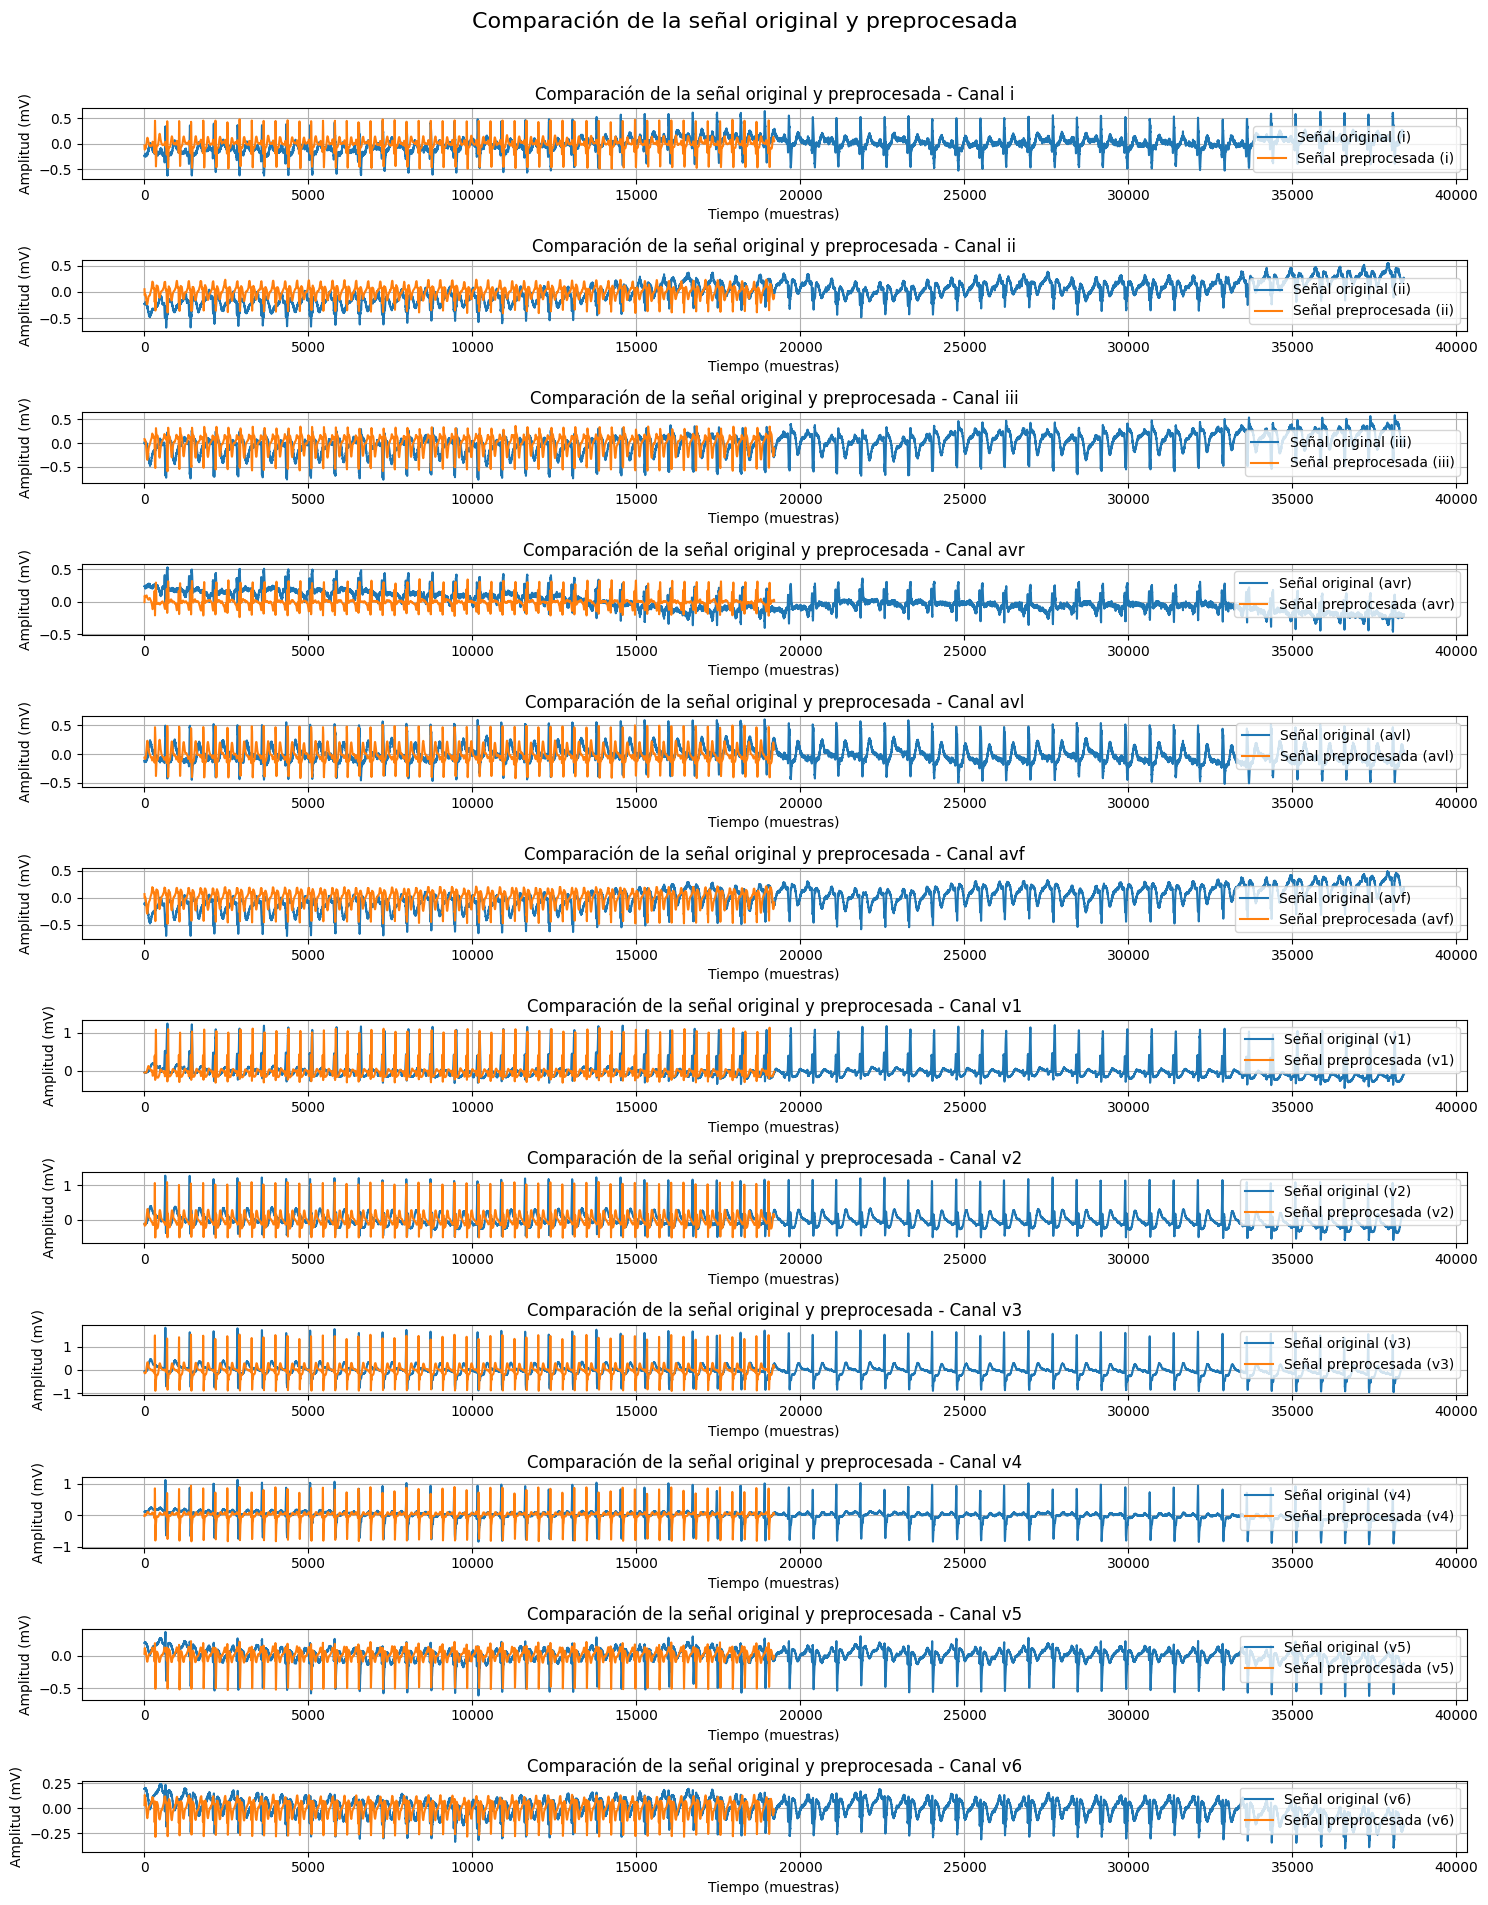

In [32]:
# Carga de registros para comparativa
record_stemi_preprocesado = wfdb.rdrecord(folder_path_preprocess_stemi + '/' + registros_stemi[0])

record_stemi_original = wfdb.rdrecord(folder_path_ptb_diagnostic + '/patient001/' + registros_stemi[0])

# Grafico comparativo entre los record preprocess y el original

plt.figure(figsize=(15, 20))

for i in range(12):
    plt.subplot(12, 1, i+1)
    plt.plot(record_stemi_original.p_signal[:, i], label=f'Señal original ({record_stemi_original.sig_name[i]})')
    plt.plot(record_stemi_preprocesado.p_signal[:, i], label=f'Señal preprocesada ({record_stemi_preprocesado.sig_name[i]})')
    plt.title(f'Comparación de la señal original y preprocesada - Canal {record_stemi_original.sig_name[i]}')
    plt.ylabel('Amplitud (mV)')
    plt.xlabel('Tiempo (muestras)')
    plt.legend()
    plt.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Comparación de la señal original y preprocesada', fontsize=16)
plt.show()



### Comparación de señales ECG de registros STEMI y HC

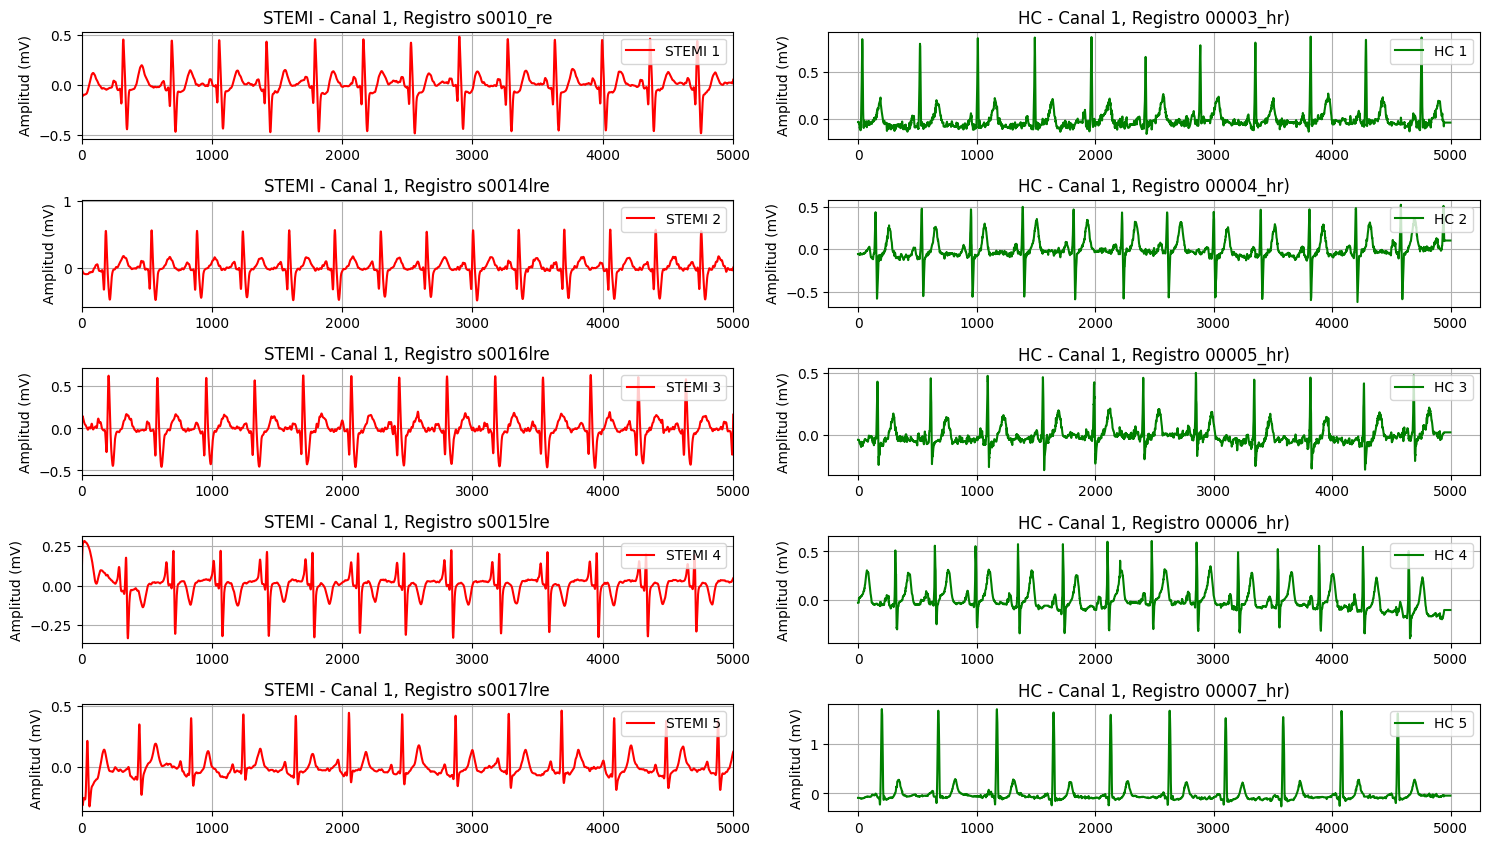

In [33]:

# Comparar señales de stemi_records y hc_records
hc_records_path = './Databases/PTB-XL/records500/00000'

# Cargar 5 registros de pacientes STEMI preprocesados
stemi_records_5 = []
hc_records_5 = []

# Elegir los 5 primeros registros 
for registro in registros_stemi[:5]:
    record = wfdb.rdrecord(folder_path_preprocess_stemi + '/' + registro)
    stemi_records_5.append(record)

# Elegir los primeros 5 registros de hc_records

for registro in hc_records[:5]:
    record = wfdb.rdrecord(hc_records_path + '/' + registro)
    hc_records_5.append(record)


# Selección de un canal y los primeros 5 registros a comparar
canal_a_comparar = 0  

# Graficar señales de los pacientes
plt.figure(figsize=(15, 10))

for i in range(5):
    stemi_signal = stemi_records_5[i].p_signal[:, canal_a_comparar]
    hc_signal = hc_records_5[i].p_signal[:, canal_a_comparar]

    plt.subplot(6, 2, 2*i + 1)
    plt.plot(stemi_signal, label=f'STEMI {i+1}', color='red')
    plt.title(f'STEMI - Canal {canal_a_comparar + 1}, Registro {stemi_records_5[i].record_name}')
    plt.ylabel('Amplitud (mV)')
    plt.legend(loc='upper right')
    plt.xlim(0,5000)
    plt.grid(True)

    plt.subplot(6, 2, 2*i + 2)
    plt.plot(hc_signal, label=f'HC {i+1}', color='green')
    plt.title(f'HC - Canal {canal_a_comparar + 1}, Registro {hc_records_5[i].record_name})')
    plt.ylabel('Amplitud (mV)')
    plt.legend(loc='upper right')
    plt.grid(True)

plt.tight_layout()
plt.show()

## Modelado Simple

En este apartado se comienza con la extracción de características de los registros ECG. Para esto se extraerán las características de media, desviación estándar, mínimo y máximo de los 12 canales de los registros STEMI y HC.

### Establecimiento de funciones

Aqui se establecen las funciones que se utilizarán para la extracción de características de los registros ECG

In [34]:
import numpy as np

# Función para extraer características básicas
def extract_features(signal):
    features = {}
    features['mean'] = np.mean(signal)
    features['std'] = np.std(signal)
    features['max'] = np.max(signal)
    features['min'] = np.min(signal)
    return features
# Función para extraer todas las características de todas las señales de un registro
def extract_all_features(record):
    for lead_signal in record.p_signal.T:  # Iterar sobre cada derivación
        ecg_features.append(extract_features(lead_signal))


### Extracción de características

#### Registros STEMI

Aqui se hace uso del iterador de la base de datos PTB Diagnostic ECG para extraer las características de los registros STEMI

In [35]:

# Extraer características para cada derivación del ECG
ecg_features = []

PTBDiagnosticDatabaseIterator(folder_path_preprocess_stemi,registros_stemi, extract_all_features)

Aqui se muestra los resultados de las características extraidas de los registros STEMI

In [36]:
import pandas as pd

# Cantidad de features extraidas
print("Cantidad de features: " + str(len(ecg_features)))

# Mostrar las características extraídas como tabla

# Convertir la lista de diccionarios en un DataFrame
df_features_temp = pd.DataFrame(ecg_features)

# Mostrar las primeras filas del DataFrame
print(df_features_temp.head())
print(df_features_temp.tail())

# Uso de un indice para crear los labels de las features relacionadas con los registros STEMI
lastIndexStemi = len(ecg_features)

Cantidad de features: 4152
       mean       std       max       min
0 -0.000154  0.132448  0.484123 -0.493229
1 -0.000635  0.121014  0.235266 -0.411324
2 -0.000483  0.188829  0.360506 -0.591180
3  0.000394  0.084793  0.343914 -0.240460
4  0.000165  0.151433  0.511246 -0.418872
          mean       std       max       min
4147  0.002090  0.154665  1.723656 -0.714601
4148  0.001972  0.131806  1.604788 -0.442811
4149  0.001867  0.169977  1.504225 -0.351772
4150  0.001892  0.206157  1.516372 -0.300463
4151  0.001984  0.160608  1.599052 -0.294402


#### Registros HC

Aqui se realiza el mismo procedimiento anterior pero con los registros de los pacientes sanos (HC) extraidos de la base de datos PTB-XL

In [37]:
# Iteración de extracción de caracteristicas de los registros de los pacientes sanos
PTBXL_Iterator(extract_all_features)
# Uso de un indice para crear los labels de las features relacionadas con los registros HC
lastIndexHC = len(ecg_features)

print("Cantidad de features: " + str( lastIndexHC - lastIndexStemi))

# Convirtiendo a dataframe
import pandas as pd
ecg_features_df = pd.DataFrame(ecg_features)

Cantidad de features: 4152


### Creación de labels

Se hace un una lista con los labels correspondientes a STEMI (1) y HC (0) utilizando los indices extraidos anteriormente como los margenes de la lista

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Creando labels, 1 para STEMI y 0 para HC

labels = []
for e in range(0,lastIndexStemi):
    labels.append(1)

for e in range(lastIndexStemi, lastIndexHC):
    labels.append(0)


### Creación de set de entrenamiento y pruebas

En este apartado se utilizan las caracteristicas extraidas de los registros STEMI y HC para crear un set de entrenamiento y pruebas con un 80% de los datos para entrenamiento y 20% para pruebas:

- X_train: Este es el subconjunto de características del ECG utilizado para entrenar el modelo.
- X_test: Este es el subconjunto de características del ECG utilizado para probar el modelo.
- y_train: Estas son las etiquetas correspondientes al subconjunto de entrenamiento.
- y_test: Estas son las etiquetas correspondientes al subconjunto de prueba.

In [39]:

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(ecg_features_df, labels, test_size=0.2, random_state=42)

### Creación de modelo usando Random Forest

Aqui se hace uso del algoritmo Random Forest para la clasificación de los registros STEMI y HC

In [40]:
# Crear el modelo de Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### Evaluación de modelo Random Forest

Se realizan predicciones al modelo previamente creado y se contrastan con los valores reales para evaluar el rendimiento del modelo

In [41]:
# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
print("Precisión:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

Precisión: 0.8898254063816978
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.93      0.84      0.88       835
           1       0.86      0.94      0.89       826

    accuracy                           0.89      1661
   macro avg       0.89      0.89      0.89      1661
weighted avg       0.89      0.89      0.89      1661



Se realiza la evaluación del modelo Random Forest utilizando la matriz de confusión y el indicador f1 score

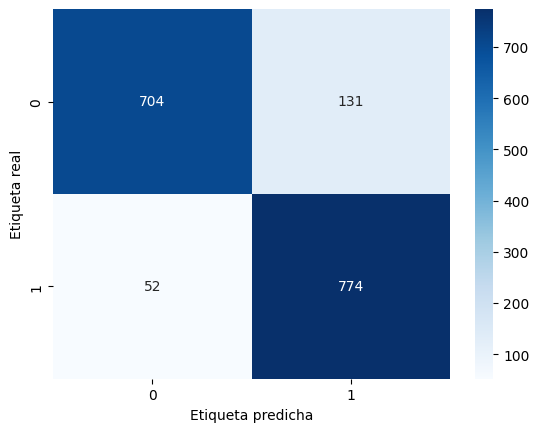

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predicha')
plt.show()


### Análisis Random Forest


Utilizando caracteristicas basicas de los canales se puede construir un modelo con una precisión de 88% utilizando Random Forest para clasificar los registros de pacientes STEMI y HC.

### Exportación de modelo Random Forest

Se hace uso de la libreria joblib para exportar el modelo entrenado

In [43]:
import joblib

joblib.dump(model, 'random_forest_model_simple.pkl')

['random_forest_model_simple.pkl']

## Modelado Complejo

El modelado complejo consta de la extracción de características utilizando como referencia los latidos del canal I. Para lo anterior, se utilizan punto de referencia los picos de R utilizando la libreria biosppy.

Principalmente en este modelado se hará uso de 2 tipos de segmentos:

- Extracción de características del complejo QRST
- Extracción de características del segmento ST

En ambos se extraeran sus respectivas características de media, desviación estándar, mínimo, máximo y duración.

### Establecimiento de funciones

In [87]:
import biosppy
import numpy as np

def extract_rpeaks_indexes(record):
    # Obtener señal i
    signal_i = record.p_signal[:, 0]

    # Obtener frecuencia de muestreo
    fs = record.fs

    ecg_data = biosppy.signals.ecg.ecg(signal=signal_i, sampling_rate=fs, show=False)

    # Obtener índices de los picos R
    rpeaks = ecg_data['rpeaks']

    return rpeaks

import numpy as np

def find_minimum_before(index, signal, window=30):
    """Encuentra el mínimo en una ventana antes del índice dado."""
    if index <= 0:
        raise ValueError("El índice debe ser mayor que 0 para buscar un mínimo antes.")
    
    start = max(0, index - window)
    segment = signal[start:index]
    
    if len(segment) == 0:
        return None  # o puedes lanzar una excepción
    return np.argmin(segment) + start



def find_minimum_after(index, signal, window=30):
    """Encuentra el mínimo en una ventana después del índice dado."""
    if index >= len(signal) - 1:
        raise ValueError("El índice debe ser menor que la longitud de la señal menos 1 para buscar un mínimo después.")
    
    end = min(len(signal), index + window)
    segment = signal[index:end]
    
    if len(segment) == 0:
        return None  # o puedes lanzar una excepción
    return np.argmin(segment) + index

def find_maximum_after(index, signal, window=150):
    """Encuentra el máximo en una ventana después del índice dado."""
    if index >= len(signal) - 1:
        raise ValueError("El índice debe ser menor que la longitud de la señal menos 1 para buscar un máximo después.")
    
    end = min(len(signal), index + window)
    segment = signal[index:end]
    
    if len(segment) == 0:
        return None  # o puedes lanzar una excepción
    return np.argmax(segment) + index


# Extraer características de un segmento dado
def feature_extractor(signal):
    features = {}
    features['mean'] = np.mean(signal)
    features['std'] = np.std(signal)
    features['max'] = np.max(signal)
    features['min'] = np.min(signal)
    features['shape'] = signal.shape[0]
    return features
    
# Extrae un segmento de una señal utilizando puntos de referencia
def extract_segment(start_point,end_point,signal):

    return signal[start_point:end_point]
# Dado un pico R, extrae las caracteristicas de los segmentos QRST y ST
def extract_beat_features(signal,r_peak,type):
    # Encuentra el mínimo antes del pico R para Q
    q_point = find_minimum_before(r_peak, signal)
    if q_point is None:
        return

    # Encuentra el mínimo después del pico R para S
    s_point = find_minimum_after(r_peak, signal)
    if s_point is None:
        return

    # Encuentra el máximo después del punto S para T
    t_point = find_maximum_after(s_point, signal)
    if t_point is None:
        return

    # Extraer segmentos QRST
    qrst_segment = extract_segment(q_point, t_point, signal)
    if len(qrst_segment) == 0:
        return

    st_segment = extract_segment(s_point, t_point, signal)
    if len(st_segment) == 0:
        return

    # Extraer segmentos QRST
    qrst_segment = extract_segment(q_point, t_point, signal)
    st_segment = extract_segment(s_point, t_point, signal)

    if type == 'STEMI':
        # Extraer características del segmento QRST
        qrst_features_STEMI.append(feature_extractor(qrst_segment))
        # Extraer características del segmento ST
        st_features_STEMI.append(feature_extractor(st_segment))
    elif type == 'HC':
        qrst_features_HC.append(feature_extractor(qrst_segment))
        st_features_HC.append(feature_extractor(st_segment)) 


def extract_features_record(record,type):

    r_peaks = extract_rpeaks_indexes(record)

    for lead_signal in record.p_signal.T:

        for r_peak in r_peaks:
            if len(lead_signal) > 0:
                extract_beat_features(lead_signal,r_peak,type)


def extract_Q_points(signal, r_peaks):
    q_points = []
    for r_peak in r_peaks:
        q_points.append(find_minimum_before(r_peak, signal)) 

    return q_points

def extract_S_points(signal, r_peaks):
    s_points = []
    for r_peak in r_peaks:
        s_points.append(find_minimum_after(r_peak, signal)) 

    return s_points

def extract_T_points(signal,s_points):
    t_points = []
    for s_point in s_points:
        t_points.append(find_maximum_after(s_point, signal))
    return t_points

### Ejemplo de la identificación de los picos R y puntos QST

Extracción de puntos y picos R

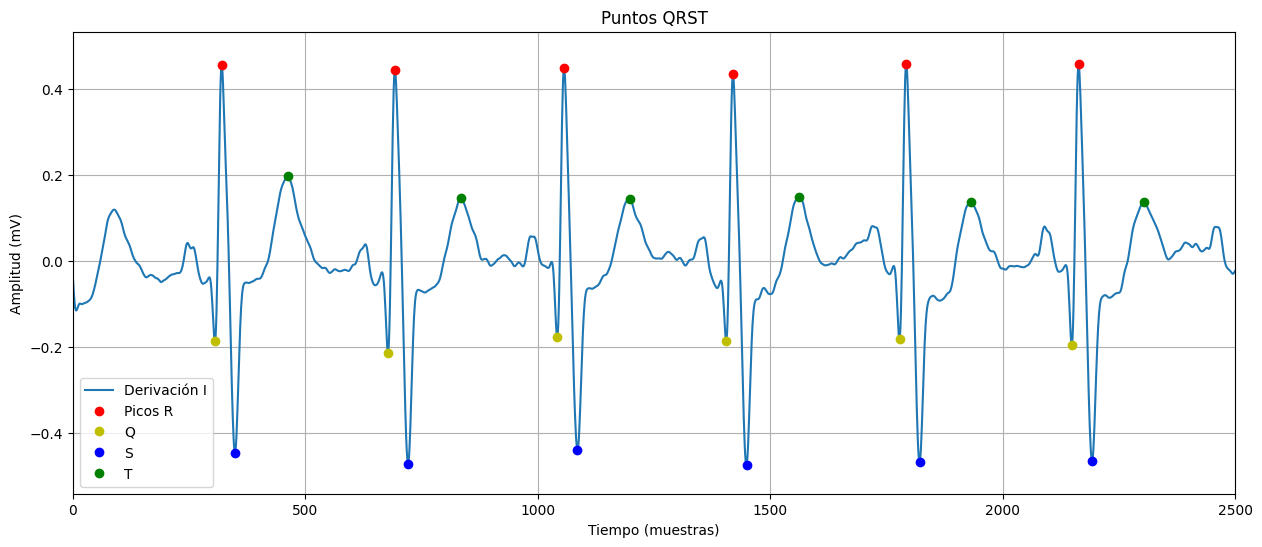

In [ ]:
import biosppy

fs = 500

# Cargar un registro STEMI
record_stemi = wfdb.rdrecord(folder_path_preprocess_stemi + '/' + registros_stemi[0])

i_derivation = record_stemi.p_signal[:, 0]

r_peaks = extract_rpeaks_indexes(record_stemi)

q_points = extract_Q_points(i_derivation, r_peaks)

s_points = extract_S_points(i_derivation, r_peaks)

t_points = extract_T_points(i_derivation,s_points)



Graficado de un complejo QRST

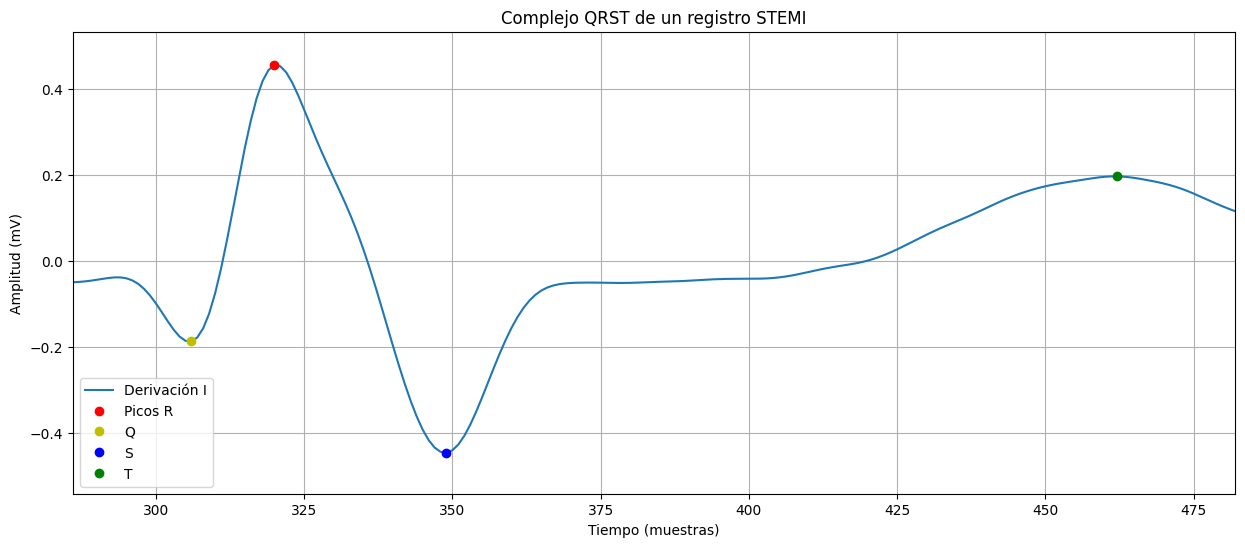

In [96]:
# graficar lo puntos
plt.figure(figsize=(15, 6))
plt.plot(i_derivation, label='Derivación I')
plt.plot(r_peaks, i_derivation[r_peaks], 'ro', label='Picos R')
plt.plot(q_points, i_derivation[q_points], 'yo', label='Q' )
plt.plot(s_points, i_derivation[s_points], 'bo', label='S')
plt.plot(t_points, i_derivation[t_points], 'go', label='T')
plt.title('Complejo QRST de un registro STEMI')
plt.xlim(q_points[0] -20,t_points[0]+20)
plt.xlabel('Tiempo (muestras)')
plt.ylabel('Amplitud (mV)')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

Graficado de varios complejos QRST

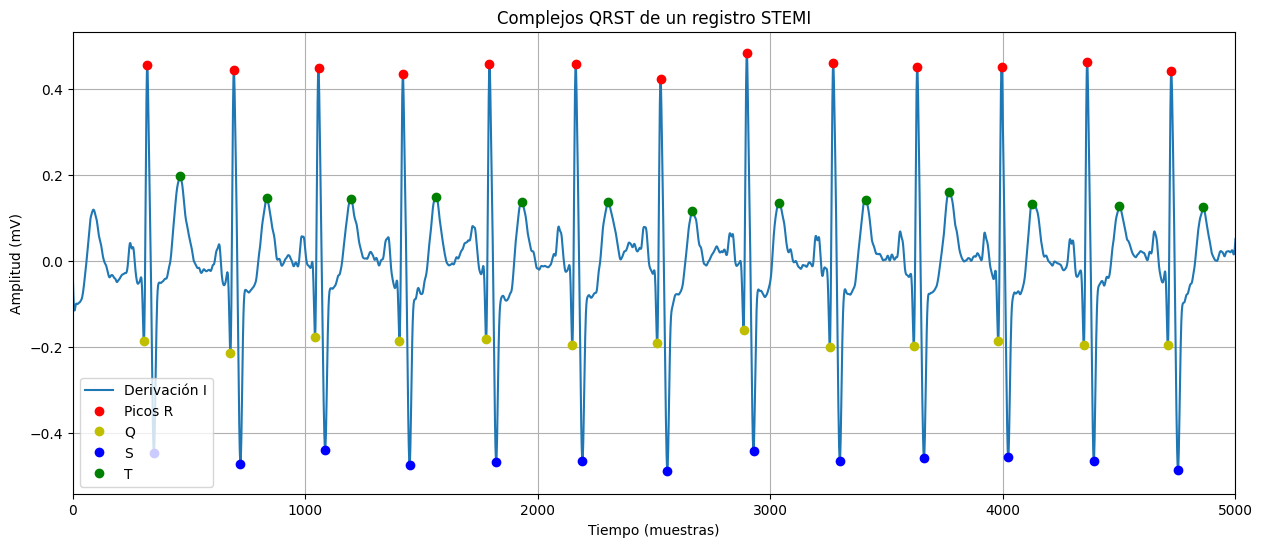

In [97]:

# graficar lo puntos
plt.figure(figsize=(15, 6))
plt.plot(i_derivation, label='Derivación I')
plt.plot(r_peaks, i_derivation[r_peaks], 'ro', label='Picos R')
plt.plot(q_points, i_derivation[q_points], 'yo', label='Q' )
plt.plot(s_points, i_derivation[s_points], 'bo', label='S')
plt.plot(t_points, i_derivation[t_points], 'go', label='T')
plt.title('Complejos QRST de un registro STEMI')
plt.xlim(0,5000)
plt.xlabel('Tiempo (muestras)')
plt.ylabel('Amplitud (mV)')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

### Extracción de features

Aqui se realiza la extracción de 

In [45]:

st_features_HC = []
qrst_features_HC = []


PTBXL_Iterator(lambda record: extract_features_record(record, 'HC'))


In [ ]:
print("Cantidad de features QRST HC: " + str(len(qrst_features_HC)))
print("Cantidad de features ST HC: " + str(len(st_features_HC)))

Cantidad de features QRST HC: 44236
Cantidad de features ST HC: 44236


In [47]:

st_features_STEMI = []
qrst_features_STEMI = []

PTBDiagnosticDatabaseIterator(folder_path_preprocess_stemi,registros_stemi,lambda record: extract_features_record(record, 'STEMI'))

In [48]:
print("Cantidad de features QRST STEMI: " + str(len(qrst_features_STEMI)))

print("Cantidad de features ST STEMI: " + str(len(st_features_STEMI)))

Cantidad de features QRST STEMI: 557134
Cantidad de features ST STEMI: 557134


### Balanceando features

Debido a que la extracción de features es muy deproporcionada respecto a los registros STEMI y HC, se procede a balancear las features para que el modelo pueda aprender de manera correcta.

In [49]:
# Limitando las features de registros STEMI a la cantidad de features de los registros HC
qrst_features_STEMI_truncated = qrst_features_STEMI[:len(qrst_features_HC)]
st_features_STEMI_truncated = st_features_STEMI[:len(st_features_HC)]

print("Cantidad de features QRST STEMI truncados: " + str(len(qrst_features_STEMI_truncated)))

print("Cantidad de features ST truncados: " + str(len(st_features_STEMI_truncated)))

Cantidad de features QRST STEMI truncados: 44236
Cantidad de features ST truncados: 44236


### Concatenación de complejos QRST

In [50]:
# Concatenación de features
QRST_complex_HC_STEMI = qrst_features_STEMI_truncated+qrst_features_HC

# Creación de dataframe
DF_QRST_HC_STEMI = pd.DataFrame(QRST_complex_HC_STEMI)

DF_QRST_HC_STEMI.shape[0]

88472

### Concatenación de segmentos ST

In [51]:
# Concatenación
ST_Segments_HC_STEMI = st_features_STEMI_truncated+st_features_HC

# Creación de dataframe
DF_ST_Segments_HC_STEMI = pd.DataFrame(ST_Segments_HC_STEMI)

DF_ST_Segments_HC_STEMI.shape[0]

88472

### Creación de labels

In [52]:
# Creando labels, 1 para STEMI y 0 para HC

length_features_HC = len(qrst_features_HC)
length_features_STEMI = len(qrst_features_STEMI_truncated)

labels = []
for e in range(0,length_features_STEMI):
    labels.append(1)

for e in range(length_features_STEMI, DF_QRST_HC_STEMI.shape[0]):
    labels.append(0)

print("Cantidad de labels: ", len(labels))

Cantidad de labels:  88472


### Creación de set de entrenamiento y pruebas

In [53]:
# Dividir en entrenamiento y prueba para los complejos QRST
X_QRST_train, X_QRST_test, y_QRST_train, y_QRST_test = train_test_split(DF_QRST_HC_STEMI, labels, test_size=0.2, random_state=42)

# Dividir en entrenamiento y prueba para los segmentos ST
X_ST_train, X_ST_test, y_ST_train, y_ST_test = train_test_split(DF_ST_Segments_HC_STEMI, labels, test_size=0.2, random_state=42)

### Creación de modelos usando Random Forest

In [54]:
# Crear el modelo de Random Forest para los complejos QRST
model_qrst = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo QRST
model_qrst.fit(X_QRST_train, y_QRST_train)



RandomForestClassifier(random_state=42)

In [55]:
# Crear el modelo de Random Forest para los segmentos ST
model_st = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo ST
model_st.fit(X_ST_train, y_ST_train)

RandomForestClassifier(random_state=42)

### Evaluación de modelos

In [56]:
# Hacer predicciones en modelo QRST
y_QRST_pred = model_qrst.predict(X_QRST_test)

# Evaluar el rendimiento del modelo QRST
print("Precisión:", accuracy_score(y_QRST_test, y_QRST_pred))
print("Reporte de clasificación:\n", classification_report(y_QRST_test, y_QRST_pred))

Precisión: 0.9593105397004804
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      8864
           1       0.95      0.97      0.96      8831

    accuracy                           0.96     17695
   macro avg       0.96      0.96      0.96     17695
weighted avg       0.96      0.96      0.96     17695



In [57]:
# Hacer predicciones en modelo ST
y_ST_pred = model_st.predict(X_ST_test)

# Evaluar el rendimiento del modelo ST
print("Precisión:", accuracy_score(y_ST_test, y_ST_pred))
print("Reporte de clasificación:\n", classification_report(y_ST_test, y_ST_pred))

Precisión: 0.9074314778185928
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.91      0.90      0.91      8864
           1       0.90      0.91      0.91      8831

    accuracy                           0.91     17695
   macro avg       0.91      0.91      0.91     17695
weighted avg       0.91      0.91      0.91     17695



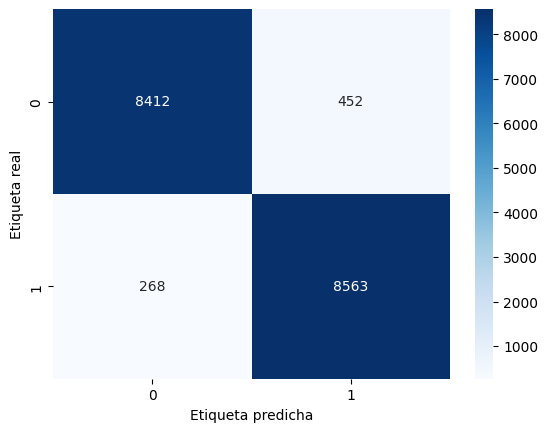

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de confusión
cm_QRST = confusion_matrix(y_QRST_test, y_QRST_pred)
sns.heatmap(cm_QRST, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predicha')
plt.show()

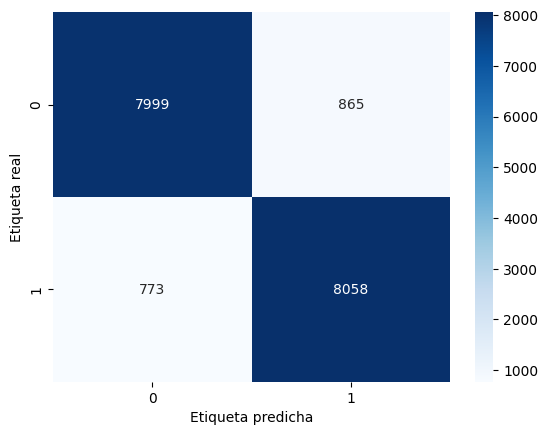

In [59]:
# Matriz de confusión
cm_ST = confusion_matrix(y_ST_test, y_ST_pred)
sns.heatmap(cm_ST, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predicha')
plt.show()

### Análisis de resultados de ambos modelos complejos

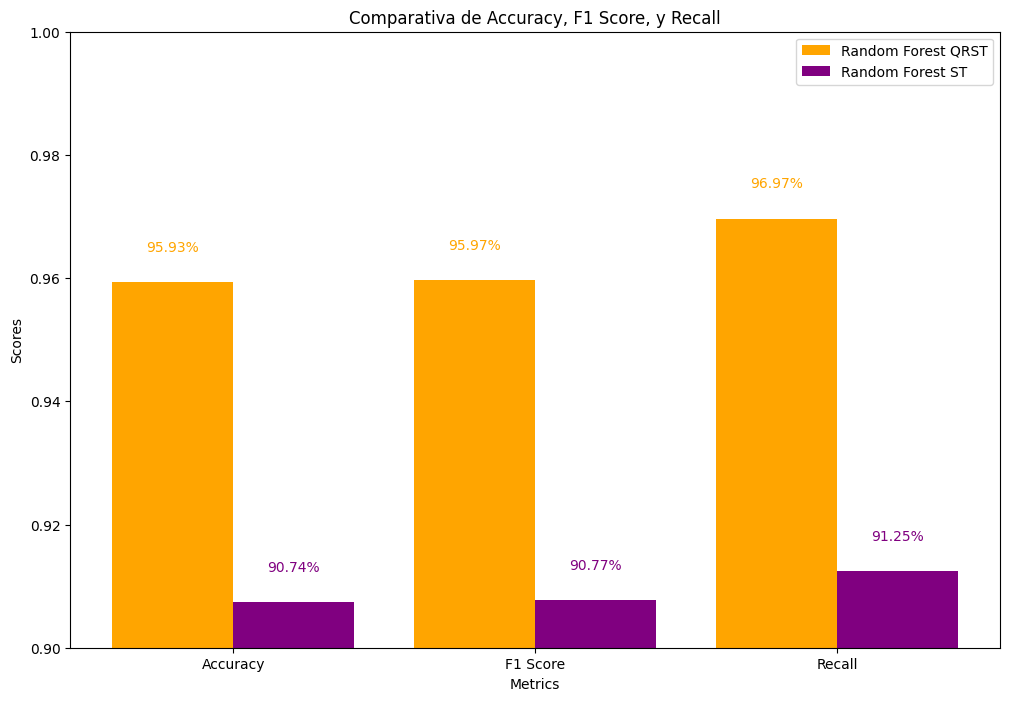

In [ ]:
from sklearn.metrics import f1_score, recall_score

# Gráfico comparativo entre accuracy
# Calcular metricas
accuracy_qrst = accuracy_score(y_QRST_test, y_QRST_pred)
accuracy_st = accuracy_score(y_ST_test, y_ST_pred)
f1_qrst = f1_score(y_QRST_test, y_QRST_pred)
f1_st = f1_score(y_ST_test, y_ST_pred)
recall_qrst = recall_score(y_QRST_test, y_QRST_pred)
recall_st = recall_score(y_ST_test, y_ST_pred)

plt.figure(figsize=(12, 8))
metrics = ['Accuracy', 'F1 Score', 'Recall']
qrst_values = [accuracy_qrst, f1_qrst, recall_qrst]
st_values = [accuracy_st, f1_st, recall_st]

x = range(len(metrics))
bar_width = 0.4
plt.bar(x, qrst_values, width=bar_width, label='Random Forest QRST', align='center', color='orange')
plt.bar([i + bar_width for i in x], st_values, width=bar_width, label='Random Forest ST', align='center', color='purple')

# Agregar porcentajes
for i in range(len(metrics)):
    plt.text(i, qrst_values[i] + 0.005, f'{qrst_values[i]*100:.2f}%', ha='center', color='orange')
    plt.text(i + bar_width, st_values[i] + 0.005, f'{st_values[i]*100:.2f}%', ha='center', color='purple')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparativa de Accuracy, F1 Score, y Recall')
plt.xticks([i + bar_width / 2 for i in x], metrics)
plt.ylim([0.9, 1])
plt.legend()
plt.show()


Como se puede observar en los resultados, los indicadores del complejo QRST son mayores a los del segmento ST. Esto debido a que se proporciona una visión mas general del latido. Pero en general la diferencia entre estos indicadores es de alrededor de un 5% del total.

Cabe destacar que aún con esta diferencia entre los resultados, tanto los indicadores del complejo QRST y del segmento ST son valores mayores al 90% lo cual indica que el modelo es capaz de clasificar de manera precisa la gran mayoria los registros STEMI y HC.

### Exportación de modelos

Aqui se exportan ambos modelos generados.

In [61]:
import joblib
# Exportación de modelo qrst
joblib.dump(model_qrst, 'random_forest_model_complex_qrst.pkl')

['random_forest_model_complex_qrst.pkl']

In [62]:
# Exportación de modelo qrst
joblib.dump(model_qrst, 'random_forest_model_complex_st.pkl')

['random_forest_model_complex_st.pkl']

## Conclusión

Sección donde se resumen los resultados obtenidos en el proyecto

## Gráficos comparativos

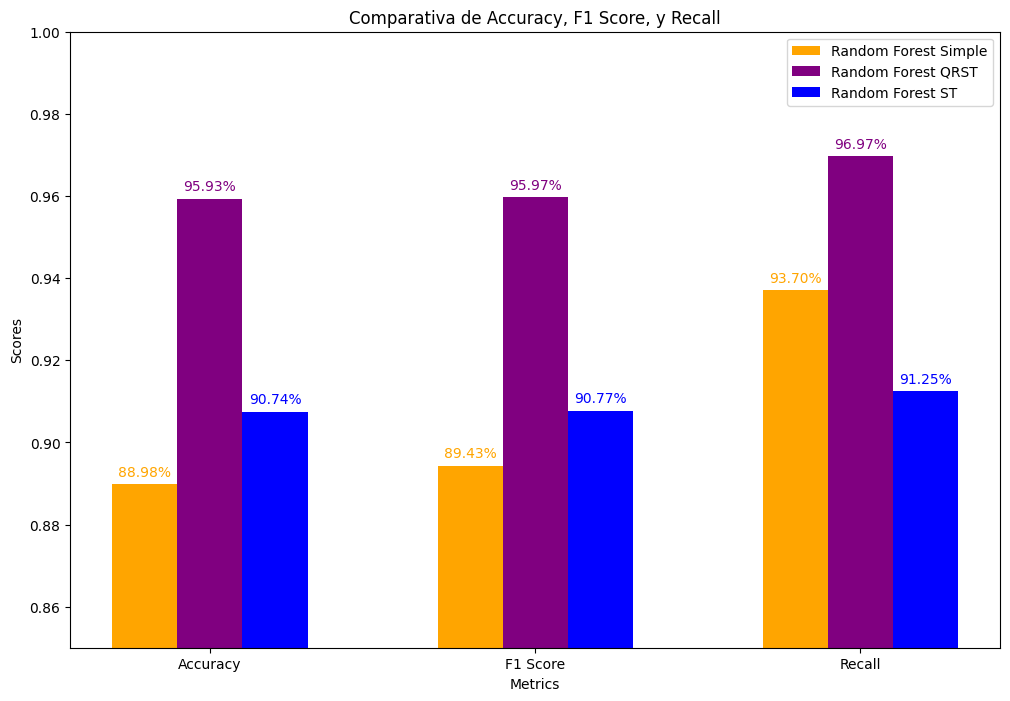

In [70]:
# Grafico comparativo entre modelo simple y los modelos complejos

# Calcular metricas
accuracy_simple = accuracy_score(y_test, y_pred)
accuracy_qrst = accuracy_score(y_QRST_test, y_QRST_pred)
accuracy_st = accuracy_score(y_ST_test, y_ST_pred)


f1_simple = f1_score(y_test, y_pred)
f1_qrst = f1_score(y_QRST_test, y_QRST_pred)
f1_st = f1_score(y_ST_test, y_ST_pred)

recall_simple = recall_score(y_test, y_pred)
recall_qrst = recall_score(y_QRST_test, y_QRST_pred)
recall_st = recall_score(y_ST_test, y_ST_pred)

# Crear plot
plt.figure(figsize=(12, 8))
metrics = ['Accuracy', 'F1 Score', 'Recall']
simple_values = [accuracy_simple, f1_simple, recall_simple]
qrst_values = [accuracy_qrst, f1_qrst, recall_qrst]
st_values = [accuracy_st, f1_st, recall_st]

x = range(len(metrics))
bar_width = 0.2
plt.bar(x, simple_values, width=bar_width, label='Random Forest Simple', align='center', color='orange')
plt.bar([i + bar_width for i in x], qrst_values, width=bar_width, label='Random Forest QRST', align='center', color='purple')
plt.bar([i + bar_width*2 for i in x], st_values, width=bar_width, label='Random Forest ST', align='center', color='blue')

# Agregar porcentajes en las barras
for i in range(len(metrics)):
    plt.text(i, simple_values[i] + 0.002, f'{simple_values[i]*100:.2f}%', ha='center', color='orange')
    plt.text(i + bar_width, qrst_values[i] + 0.002, f'{qrst_values[i]*100:.2f}%', ha='center', color='purple')
    plt.text(i + bar_width*2, st_values[i] + 0.002, f'{st_values[i]*100:.2f}%', ha='center', color='blue')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparativa de Accuracy, F1 Score, y Recall')
plt.xticks([i + bar_width  for i in x], metrics)
plt.ylim([0.85, 1])
plt.legend()
plt.show()


## Sobre los resultados

El modelo entrenado con las características completas del complejo QRST muestra una mayor capacidad para predecir la etiqueta de registro, ya sea como sano o de tipo STEMI. Es importante señalar que las diferencias entre el modelo simple, que utiliza características generales de cada canal del registro, y el modelo complejo, basado en la extracción del segmento ST, son mínimas, con una variación aproximada del 1%. Esto sugiere que, si es necesario optimizar recursos, optar por una identificación general de los registros sería preferible. Sin embargo, si se requiere una mayor precisión en el modelo, la opción más adecuada sería el modelado complejo que utiliza los puntos QRST.